## **FAVORITA STORE SALES PREDICTION**

### **Business Understanding**

##### **Problem Statement**:

Today's competitive market leverages data effectively in making informed decisions and precise forecasts. Corporation Favorita, a grocery retailer in Ecuador, seeks to optimize its business strategies by utilizing time series regression analysis. The objective of this project is to develop a robust predictive model that accurately forecasts unit sales based on historical data, including factors such as promotions and other variables. Through understanding patterns and relationships between variables, the goal is to enhance the accuracy of sales predictions and provide actionable insights for strategic decision-making.

##### **Goals and Objectives**:

1. To build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.

2. Evaluate the model's performance using appropriate evaluation metrics such as mean squared error, mean absolute error, and R-squared.

3. Provide actionable insights for strategic decision-making, such as identifying promotions or offering targeted marketing strategies.


##### **Stakeholders**
•	Favorita Company Executives and Management

•	Data Science and Analytics Team

•	Store customer service and management teams

•	Marketing and Sales and Advertisement Teams:

•	Finance

**Success Criteria**
- Achieve a 0.2 RMSE (Root Mean Squared Error) in sales forecasting models.
- Improve inventory management efficiency and reduce stockout instances.


**Data Requirements**
- Utilize data from train.csv, stores.csv, holidays_events.csv, oil.csv, and transaction.csv for analysis.
- Include features such as store_nbr, family, onpromotion, store metadata, oil prices, holidays, and transactional data.

**Business Impact**
- Enhance customer satisfaction through better product availability.
- Optimize inventory management, leading to cost savings and improved operational efficiency.

##### **Hypothesis** 
Null Hypothesis (Ho): Promotion has no significant influence on sales.

Alternate Hypothesis (Ha): Promotion has significant influence on sales.

##### **Analytical Questions**
1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?

3. Compare the sales for each month across the years and determine which month of which year had the highest sales.

4. Did the earthquake impact sales?

5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)

6. Are sales affected by promotions, oil prices and holidays?

7. What analysis can we get from the date and its extractable features?

8. Which product family and stores did the promotions affect.

9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

##### **Scope and Constraint**:
- Assumption: Historical sales data is representative of future demand patterns.
- Constraint: Limited availability of real-time sales data for model training.


#### Additional Information

This project is to be completed in 4 weeks 







### **Data Understanding**

In [1]:
# **Importation of libraries**
 #Data manipulation and analysis
import pandas as pd
import numpy as np
from itertools import product
import polars as pl
import pyarrow as pa

import warnings

warnings.filterwarnings('ignore')
 
# Database connectivity
import pyodbc
 
# Database ORM
from sqlalchemy import create_engine
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import mannwhitneyu



#### **Database connectivity**

In [2]:
#Connecting to the first databases

# Define the connection string
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'learning_project_3'
password = 'A$uB1Lp3$2@24'
conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
conn = pyodbc.connect(conn_str)
print("Connection successful")

# Queries to retrieve data from the three tables
query_oil = 'SELECT * FROM dbo.oil'
query_holidays_events = 'SELECT * FROM dbo.holidays_events'
query_stores = 'SELECT * FROM dbo.stores'

# Execute the queries and fetch the data into pandas DataFrames
df_oil = pd.read_sql(query_oil, conn)
df_holidays_events = pd.read_sql(query_holidays_events, conn)
df_stores = pd.read_sql(query_stores, conn)

# Close the connection
conn.close()

# Display the first few rows of each DataFrame
print("Oil Data:")
print(df_oil.head())

print("\nHolidays Events Data:")
print(df_holidays_events.head())

print("\nStores Data:")
print(df_stores.head())




Connection successful
Oil Data:
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02   93.139999
2  2013-01-03   92.970001
3  2013-01-04   93.120003
4  2013-01-07   93.199997

Holidays Events Data:
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  

Stores Data:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       

In [3]:
# Connecting to the test database

# File path of the CSV file
file_path = r"C:\Users\USER\Desktop\Regression-Project-\Data\test.csv"

# Load CSV file into a DataFrame
Test_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(Test_data.head())


        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0


In [4]:
#connecting to sample submission database

import pandas as pd

# File path of the CSV file
file_path = r"C:\Users\USER\Desktop\Regression-Project-\Data\sample_submission.csv"

# Load CSV file into a DataFrame
sample_submission_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(sample_submission_data.head())


        id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0


In [5]:
#connecting to train database

import pandas as pd

# File path of the CSV file
file_path = r"C:\Users\USER\Desktop\Regression-Project-\Data\train.csv"

# Load CSV file into a DataFrame
train_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(train_data.head())


   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [6]:
#connecting to transaction database 

import pandas as pd

# File path of the CSV file
file_path = r"C:\Users\USER\Desktop\Regression-Project-\Data\transactions.csv"

# Load CSV file into a DataFrame
transaction_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(transaction_data)



             date  store_nbr  transactions
0      2013-01-01         25           770
1      2013-01-02          1          2111
2      2013-01-02          2          2358
3      2013-01-02          3          3487
4      2013-01-02          4          1922
...           ...        ...           ...
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

[83488 rows x 3 columns]


#### **Exploratory Data Analysis (EDA)**

- Data Quality Assement ,EDA & Data Cleaning

In [7]:
#checking basic info for df_oil data 

df_oil.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [8]:
#checking basic info for df_holidays_events data

df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [9]:
#checking basic info for df_stores data

df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### Key Insights from column

Oil Data
1. df_oil has 19691 rows and 2 columns, with no missing values. The 'Date' column is in 'object' format, which needs to be converted to 'datetime'.
2. Daily oil prices (dcoilwtico) are recorded over time.

Data Type Changes Needed:

1. The date column must be converted to a datetime format for easier time series analysis.
2. Ensure dcoilwtico is in a numerical format (float) for numerical operations.

Holidays Events Data

1. df_holidays_events has 1115 rows and 11 columns, with no missing values. The 'date' column is in 'object' format, which needs to be converted to 'datetime'. The 'type' column has 10 unique categories.
2. Records various types of holidays and events across different locales.
3. Observing if a holiday was transferred to another date (transferred column).


- Convert date to datetime format for consistency.

- Team must ensure type, locale, locale_name, description are categorical variables or strings.

- Check for null values in city, state, type, and cluster columns, though this typically depends on data quality.
Data Type Changes Needed:

- Convert store_nbr and cluster to categorical variables if they represent categories rather than numerical values.

- Ensure city, state, type are categorical variables or strings.


##### *Further Cleaning*

In [10]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [11]:
# Convert 'date' column to datetime

df_oil['date'] = pd.to_datetime(df_oil['date'])

df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


#### *df_holidays_events data*

In [12]:
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [14]:
df_holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [15]:
# Convert 'date' column to datetime

df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])

df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


#### *Store Data*

In [16]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [17]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [18]:
df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

#### *TrainData*

In [19]:
train_data.shape

train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [20]:
# Convert 'date' column to datetime

train_data['date'] = pd.to_datetime(train_data['date'])

train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


#### *Transaction*

In [21]:
# Convert 'date' column to datetime

transaction_data['date'] = pd.to_datetime(transaction_data['date'])

transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [22]:
transaction_data.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

#### *EDA on the train Data Set*

In [23]:
# Checking the descriptive statistics of the validation data set

train_data.describe().T

,count,mean,min,25%,50%,75%,max,std
id,3000888.0,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
date,3000888,2015-04-24 08:27:04.703088384,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3000888.0,357.775749,0.0,0.0,11.0,195.84725,124717.0,1101.997721
onpromotion,3000888.0,2.60277,0.0,0.0,0.0,0.0,741.0,12.218882


In [24]:
# Checking for the unique values of the validation

train_data.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [25]:
#Checking  for unique values in all the columns
cols= ['date', 'id','store_nbr', 'family', 'sales', 'onpromotion',]

results = []

for i in cols:
    
    unique_values = train_data[i].unique()
    num_unique_values = train_data[i].nunique()
    results.append([i, unique_values, num_unique_values])

results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])
results_df

,Column,Unique_Values,Num_Unique_Values
0,date,"[2013-01-01 00:00:00, 2013-01-02 00:00:00, 201...",1684
1,id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3000888
2,store_nbr,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2,...",54
3,family,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
4,sales,"[0.0, 2.0, 810.0, 180.589, 186.0, 143.0, 71.09...",379610
5,onpromotion,"[0, 3, 5, 1, 56, 20, 19, 2, 4, 18, 17, 12, 6, ...",362


In [26]:
#Checking for duplicates 
train_data.duplicated().sum()

np.int64(0)

In [27]:
#Checking the Mising dates in the Data column and data competness
def start_end_date(df):
    # Start of the data using the date
    start_date = df['date'].min()
 
    # End of the data using the date
    end_date = df['date'].max()
 
    # Print the start and end date of the data
    print(f'Start date is {start_date}')
    print(f'End date is {end_date}')
   
    return start_date, end_date

start_date, end_date = start_end_date(oil_data1)

In [28]:
start_date, end_date = start_end_date(train_data)

Start date is 2013-01-01 00:00:00
End date is 2017-08-15 00:00:00


In [29]:
def missing_dates(df):
    # Assuming 'date' is the column with dates
    existing_dates = df['date']

    # Create a complete date range from min to max date in your data
    date_range = pd.date_range(start=min(existing_dates), end=max(existing_dates))

    # Find the dates that are in 'date_range' but not in 'existing_dates'
    missing_dates = date_range[~date_range.isin(existing_dates)]

    return missing_dates

- The Missing Date functions used to find  & retrieve the missing dates

In [30]:
# Check missing dates
all_missing_dates = missing_dates(train_data)
all_missing_dates

train_data.shape

(3000888, 6)

In [31]:
# Define the columns to fill
# Create a list of all column names in the DataFrame 'train_data6', excluding the 'date' column

columns = [column for column in train_data.columns if column != 'date']
columns

['id', 'store_nbr', 'family', 'sales', 'onpromotion']

In [32]:
# Determine the number of entries for the earliest date in the 'train_dataset'
# The code filters the DataFrame to select rows where the 'date' column matches the earliest date (minimum date),

earliest_date = train_data['date'].min()
no_entries_per_day = train_data[train_data['date'] == earliest_date].shape[0]
no_entries_per_day


1782

In [33]:
# Calculate the total number of entries by multiplying the number of entries per day (for the earliest date)
# by the length of the 'all_missing_dates' list. This assumes that the number of entries per day is consistent
# across all missing dates.

no_entries_per_day * len(all_missing_dates)

7128

- Creating missing dataframe using all missing dates, unique store_nbr and unique family category

In [34]:
# Create df with unique values for store_nbr
store_nbr_unique = train_data['store_nbr'].unique()

# Create df with unique values for family category
family_unique = train_data['family'].unique()

# Create dataframe with missinng dates and unique store_nbr and family category
missing_df = pl.DataFrame(
    list(product(all_missing_dates, store_nbr_unique, family_unique)), 
    schema=['date', 'store_nbr', 'family']
)

missing_df.shape

(7128, 3)

In [35]:
missing_df = missing_df.with_columns(
    sales=None,
    onpromotion=None,
)

missing_df.glimpse()

Rows: 7128
Columns: 5
$ date        <datetime[μs]> 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00, 2013-12-25 00:00:00
$ store_nbr            <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family               <str> 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI'
$ sales               <null> None, None, None, None, None, None, None, None, None, None
$ onpromotion         <null> None, None, None, None, None, None, None, None, None, None



- Add sales and onpromotion columns to the missing_df

In [36]:
# Convert it to a pandas DataFrame
missing_df_pandas = missing_df.to_pandas()

# Now concatenate original train_df with missing_df_pandas
combined_df = pd.concat([train_data, missing_df_pandas])

# Sort the combined DataFrame by the 'date' column
combined_df_sorted = combined_df.sort_values('date')

# Assign the sorted DataFrame back to train_df if needed
train_data = combined_df_sorted

# Display a summary of the updated train_df
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3008016 entries, 0 to 2999107
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           float64       
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 160.6+ MB


In [37]:
# Dropping the Id column since it will not be relevant for the visualizations

train_data = train_data.drop(columns= ['id'])

In [38]:
# Count the null values in each column

train_data.isnull().sum()

date              0
store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

In [39]:
# Check all missing dates

all_missing_dates = missing_dates(train_data)
all_missing_dates


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [40]:

# Get a concise summary of the DataFrame
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3008016 entries, 0 to 2999107
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 137.7+ MB
None


In [41]:
# Get basic statistics for numerical columns
print(train_data.describe())

                                date     store_nbr         sales
count                        3008016  3.008016e+06  3.000888e+06
mean   2015-04-24 12:00:00.000000512  2.750000e+01  3.577757e+02
min              2013-01-01 00:00:00  1.000000e+00  0.000000e+00
25%              2014-02-26 18:00:00  1.400000e+01  0.000000e+00
50%              2015-04-24 12:00:00  2.750000e+01  1.100000e+01
75%              2016-06-19 06:00:00  4.100000e+01  1.958473e+02
max              2017-08-15 00:00:00  5.400000e+01  1.247170e+05
std                              NaN  1.558579e+01  1.101998e+03


- Filling missing values in sales with 0.0 and onpromotion with 0

In [42]:
# Filling missing values  with 0

# Fill null values with zero
train_data = train_data.fillna(0)

train_data

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1194,2013-01-01,42,CELEBRATION,0.000,0
1193,2013-01-01,42,BREAD/BAKERY,0.000,0
1192,2013-01-01,42,BOOKS,0.000,0
1191,2013-01-01,42,BEVERAGES,0.000,0
...,...,...,...,...,...
2999695,2017-08-15,25,POULTRY,172.517,0
2999694,2017-08-15,25,PLAYERS AND ELECTRONICS,3.000,0
2999693,2017-08-15,25,PET SUPPLIES,3.000,0
2999704,2017-08-15,26,BOOKS,0.000,0


In [43]:
# Re-check for missing values
train_data.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

- Feature Engineering

In [44]:
# Store the original train columns

train_col_org = train_data.columns

In [45]:
def date_features(df):
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Extracting the year from the date and adding it to the df as a new column
    df['year'] = df['date'].dt.year

    # Extracting the month from the date and adding it to df as new column
    df['month'] = df['date'].dt.month

    # Extracting the day from the date and adding it to df as new column
    df['day'] = df['date'].dt.day

    # Extracting the weekday from the date and adding it to df as new column
    df['weekday'] = df['date'].dt.weekday

    # Extracting the quarter from the date and adding it to df as new column
    df['quarter'] = df['date'].dt.quarter

    return df

# Applying the function to the DataFrame
train_data = date_features(train_data)

# Preview of the train_data6 DataFrame
train_data

,date,store_nbr,family,sales,onpromotion,year,month,day,weekday,quarter
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,1
1194,2013-01-01,42,CELEBRATION,0.000,0,2013,1,1,1,1
1193,2013-01-01,42,BREAD/BAKERY,0.000,0,2013,1,1,1,1
1192,2013-01-01,42,BOOKS,0.000,0,2013,1,1,1,1
1191,2013-01-01,42,BEVERAGES,0.000,0,2013,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2999695,2017-08-15,25,POULTRY,172.517,0,2017,8,15,1,3
2999694,2017-08-15,25,PLAYERS AND ELECTRONICS,3.000,0,2017,8,15,1,3
2999693,2017-08-15,25,PET SUPPLIES,3.000,0,2017,8,15,1,3
2999704,2017-08-15,26,BOOKS,0.000,0,2017,8,15,1,3


- Univariate Analysis 

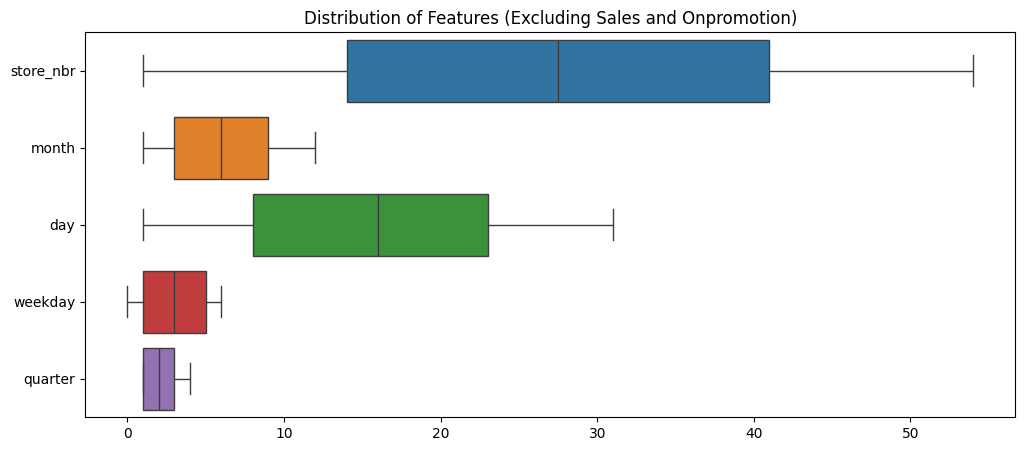

In [46]:

# Select columns to keep for the boxplot
columns_to_keep = [col for col in train_data.columns if col not in ['year', 'sales', 'onpromotion', 'family']]
df_for_boxplot = train_data[columns_to_keep]

# Plotting the boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_for_boxplot, orient='h')
plt.title('Distribution of Features (Excluding Sales and Onpromotion)')
plt.show()

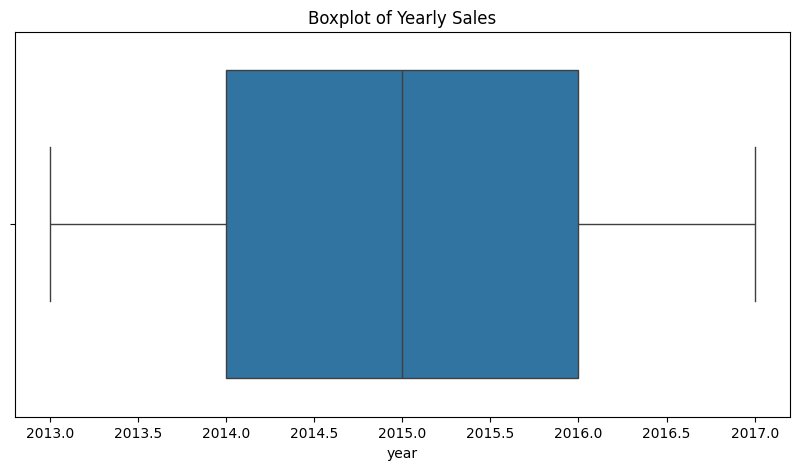

In [47]:
plt.figure(figsize = (10,5))
sns.boxplot(train_data['year'], orient = 'h')
plt.title('Boxplot of Yearly Sales')
plt.show()

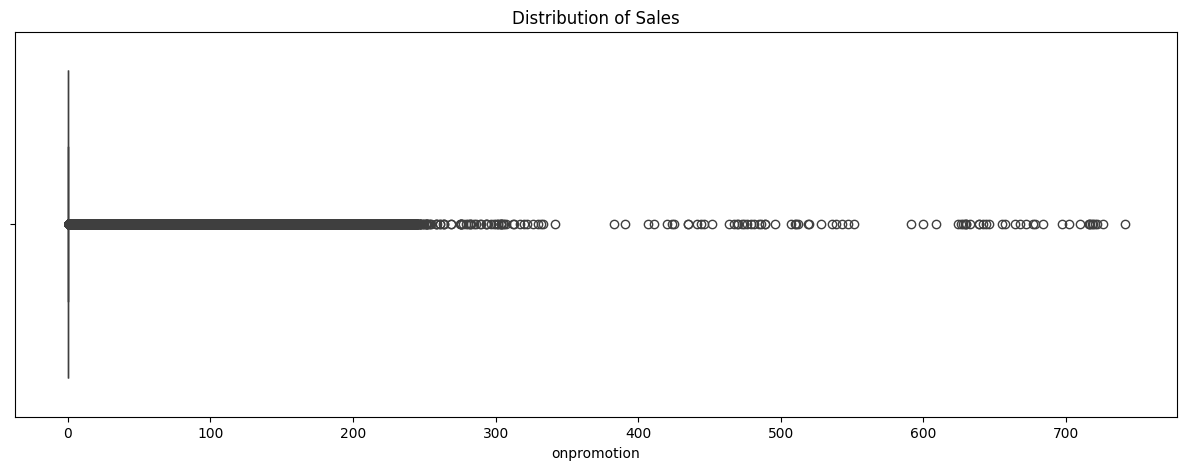

In [48]:
# Set the figure size and create a horizontal boxplot for 'sales' column
plt.figure(figsize = (15,5))
sns.boxplot(train_data['onpromotion'], orient = 'h')

# Add title to the plot
plt.title('Distribution of Sales')
plt.show()

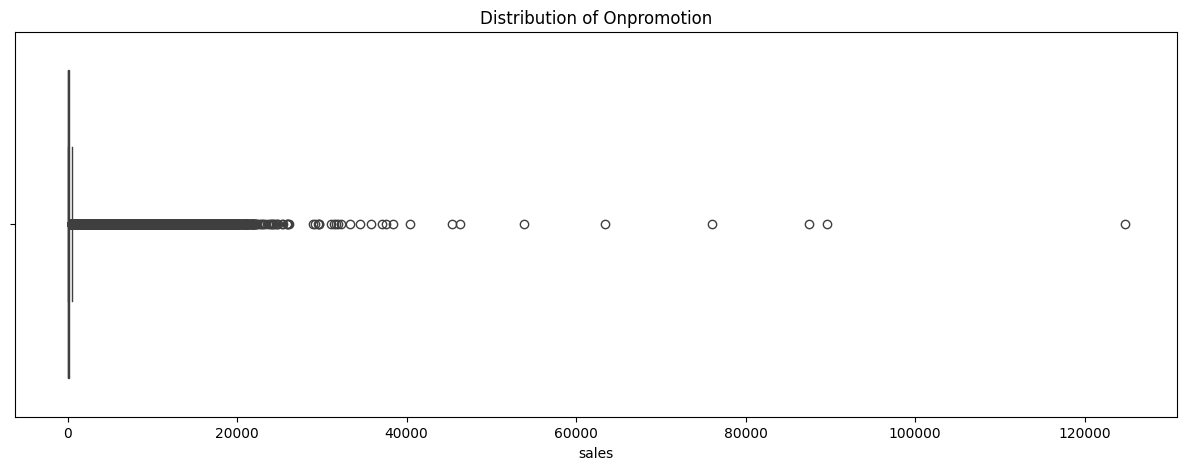

In [49]:
# Set the figure size and create a horizontal boxplot for 'onpromotion' column
plt.figure(figsize = (15,5))
sns.boxplot(train_data['sales'], orient = 'h')

# Add title to the plot
plt.title('Distribution of Onpromotion')
plt.show()

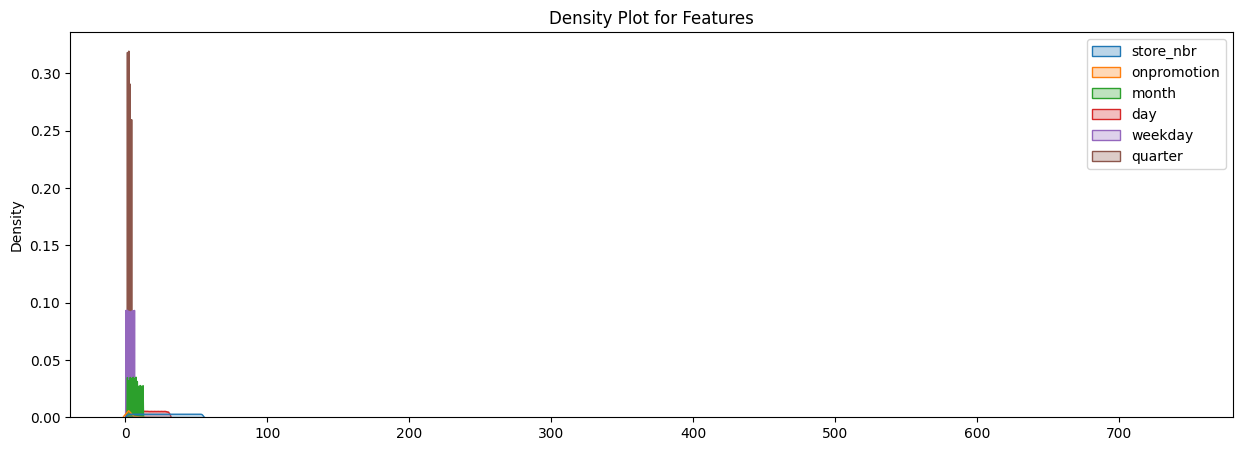

In [50]:
plt.figure(figsize=(15, 5))
sns.kdeplot(train_data.drop(columns=['year', 'sales']), alpha=0.3, fill=True)
plt.title('Density Plot for Features')
plt.show()

In [51]:
# Calculate skewness for 'sales' column
sales_skew = train_data['sales'].skew()

# Calculate skewness for numerical columns only
onpromotion_skew = train_data['onpromotion'].skew()
store_skew = train_data['store_nbr'].skew()

# Print the skewness for each column
print(f'Sales skewness = {sales_skew}')
print(f'onpromotion skewness = {onpromotion_skew}')
print(f'Store skewness = {store_skew}')

# Skip the date skewness calculation if not applicable

Sales skewness = 7.366961907141204
onpromotion skewness = 11.179506173453468
Store skewness = 0.0


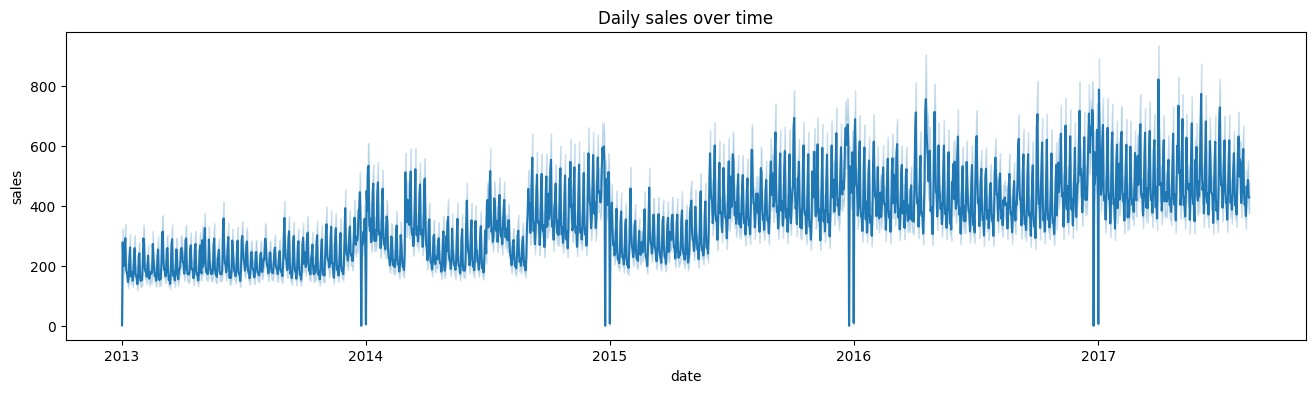

In [52]:
plt.figure(figsize=(16, 4)) 
sns.lineplot(train_data, x=train_data
['date'], y=train_data['sales'])
plt.title(f'Daily sales over time')
plt.show()

Bivariate Analysis 


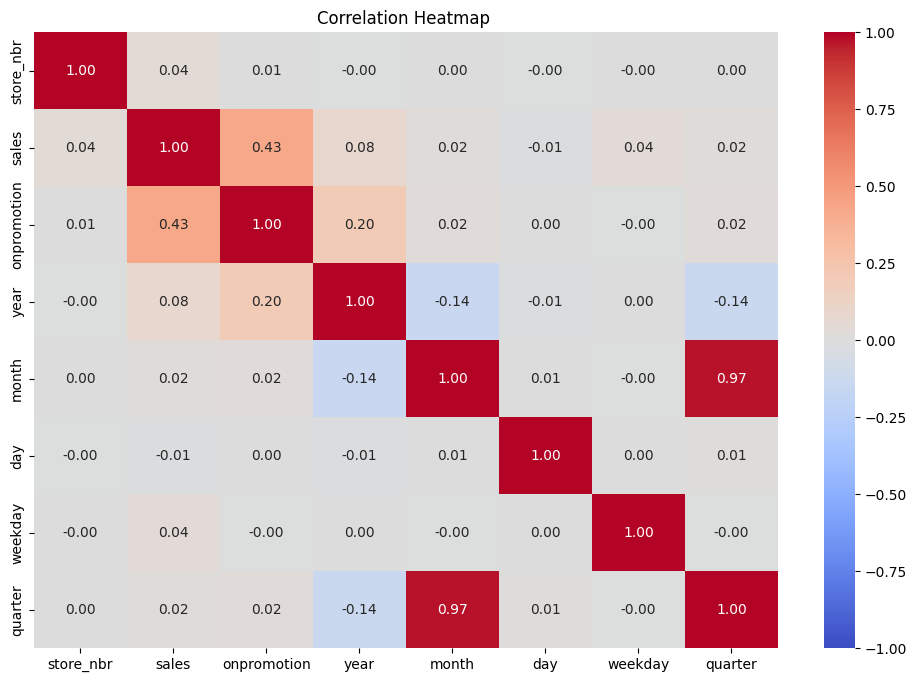

In [53]:

# Select the columns of interest
columns_of_interest = ['store_nbr', 'sales', 'onpromotion', 'year', 'month', 'day', 'weekday', 'quarter']

# Ensure columns are numeric
train_data['store_nbr'] = pd.to_numeric(train_data['store_nbr'], errors='coerce')
train_data['sales'] = pd.to_numeric(train_data['sales'], errors='coerce')
train_data['onpromotion'] = pd.to_numeric(train_data['onpromotion'], errors='coerce')

# Create a DataFrame with only the columns of interest
df_for_correlation = train_data[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap ')
plt.show()


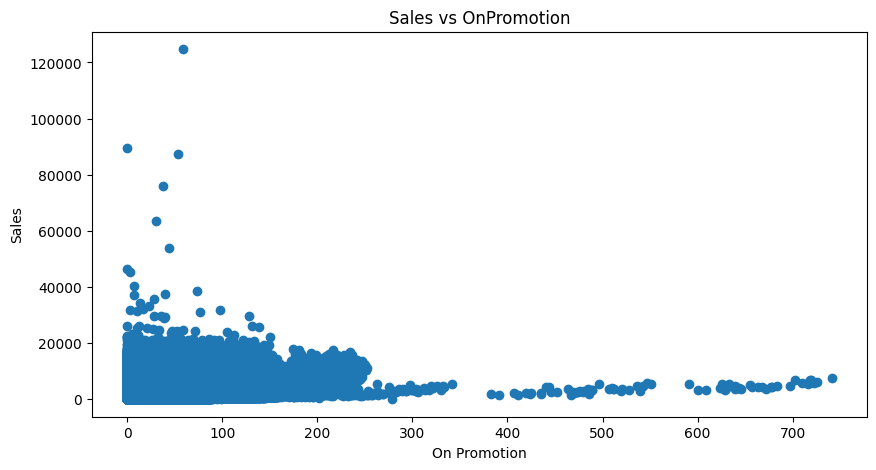

In [54]:
# Visualize relationships between sales and promotion
plt.figure(figsize=(10,5))
plt.scatter(train_data['onpromotion'], train_data['sales'])
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.title('Sales vs OnPromotion')
plt.show()

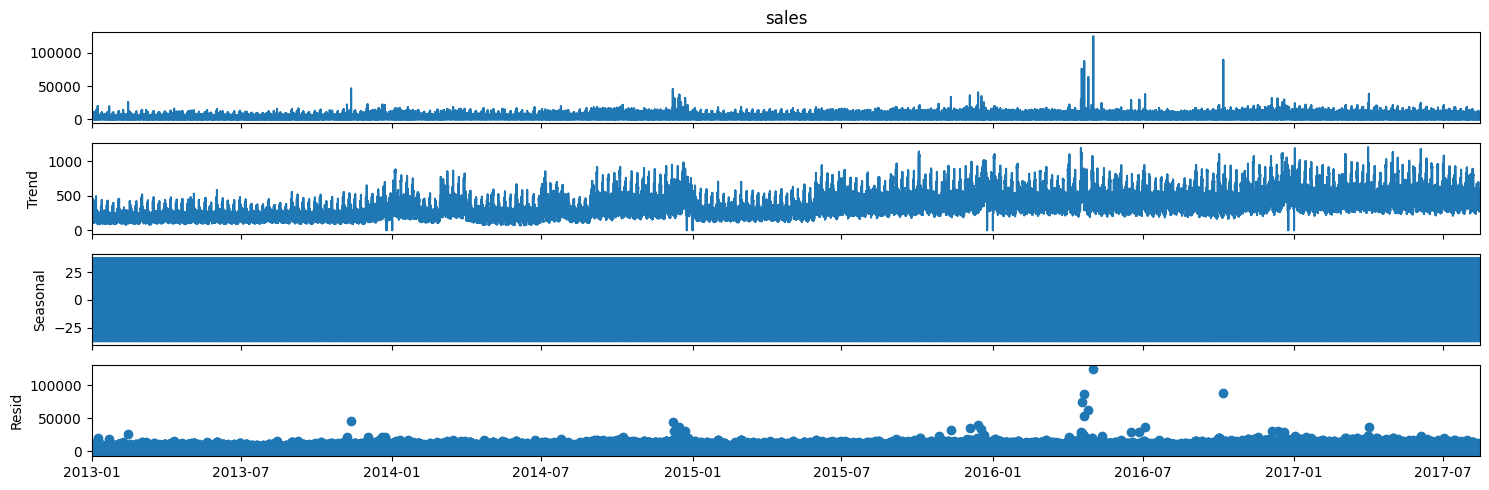

In [55]:

#  train_data6 is a Pandas DataFrame
seasonal_df = train_data[['date', 'sales']]

# Set the date column as the index
seasonal_df.set_index('date', inplace=True)

# Perform seasonal decomposition
additive_results = seasonal_decompose(seasonal_df['sales'], model='additive', period=365)

# Update rcParams to set the figure size for the plot
plt.rcParams.update({'figure.figsize': (15, 5)})

# Plot the decomposed components (trend, seasonal, residual)
additive_results.plot()

# Display the plot
plt.show()

In [56]:
# Extract components and create a new DataFrame
decomposition_df = pd.DataFrame({
        'Trend': additive_results.trend,
        'Seasonality': additive_results.seasonal,
        'Residual': additive_results.resid,
        'Observed': additive_results.observed,
            
            }) 
decomposition_df

,Trend,Seasonality,Residual,Observed
date,,,,
2013-01-01,NaN,9.228906,NaN,0.000
2013-01-01,NaN,-3.238774,NaN,0.000
2013-01-01,NaN,-5.166479,NaN,0.000
2013-01-01,NaN,-10.930616,NaN,0.000
2013-01-01,NaN,-5.841573,NaN,0.000
...,...,...,...,...
2017-08-15,NaN,13.008368,NaN,172.517
2017-08-15,NaN,13.571985,NaN,3.000
2017-08-15,NaN,-7.777916,NaN,3.000


In [57]:
# Ensure 'date' is in the DataFrame columns
print(train_data.columns)

# If 'date' is a column, set it as the index
train_data.set_index('date', inplace=True)

# Now group by the index 'date' and calculate the mean of 'sales'
resampled_df = train_data.groupby(pd.Grouper(freq='1w'))['sales'].mean()

# Check the shape of the resampled DataFrame
resampled_df


Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'quarter'],
      dtype='object')


date
2013-01-06    206.843478
2013-01-13    190.285220
2013-01-20    189.835452
2013-01-27    182.152050
2013-02-03    198.564267
                 ...    
2017-07-23    460.504663
2017-07-30    474.732392
2017-08-06    513.884368
2017-08-13    431.730145
2017-08-20    427.492801
Freq: W-SUN, Name: sales, Length: 242, dtype: float64

In [58]:
print(train_data.columns)

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day',
       'weekday', 'quarter'],
      dtype='object')


In [59]:
# Assuming 'timeseries' is your time series data
adf_result = adfuller(resampled_df)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] < 0.05:
    print("The Data is stationary.")
else:
    print("The Data is not stationary and may have a unit root.")

ADF Statistic: -1.481751
p-value: 0.542519
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574
The Data is not stationary and may have a unit root.


In [60]:
print(train_data.columns)

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day',
       'weekday', 'quarter'],
      dtype='object')


- Visualization of the stationearity using rolling Statistics

In [61]:
#Getting the rolling Average
rolling_average = train_data['sales'].rolling(window=7).mean().rename('sales_average')

# Getting the rolling Standard Deviation
rolling_std = train_data['sales'].rolling(window=7).std().rename('sales_std')

Text(0.5, 1.0, 'Rolling Statistics')

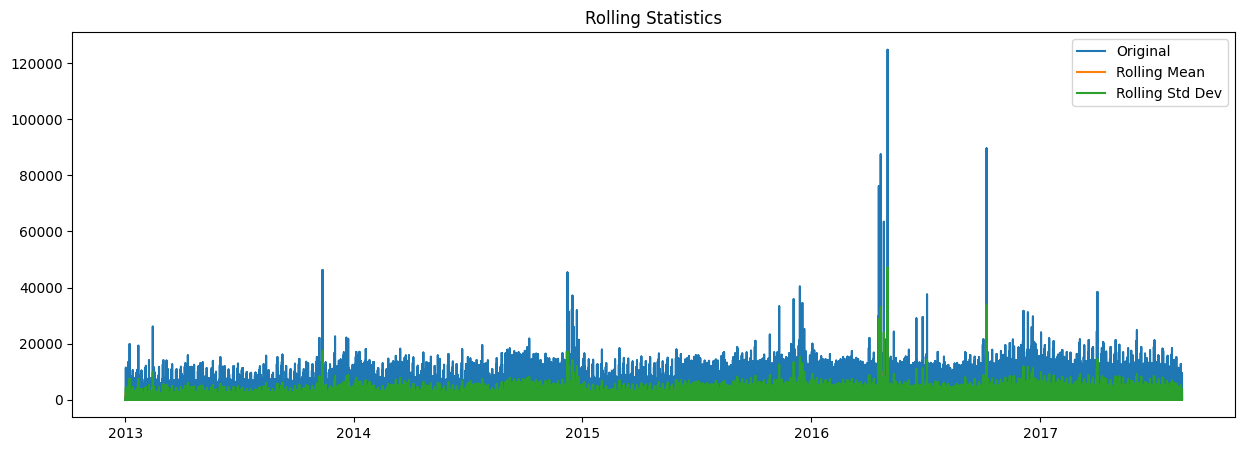

In [62]:
# Create both figure and axis objects
fig, ax = plt.subplots(figsize=(15, 5))

# Make plot
ax.plot(train_data['sales'], label='Original')
ax.plot(rolling_average, label='Rolling Mean')
ax.plot(rolling_std, label='Rolling Std Dev')

# Add legend and title
ax.legend(loc='best')
ax.set_title("Rolling Statistics")

# Show the 

#### **Key Findings** 

-  We have detected gaps in the date column, requiring us to fill in the missing dates.
- The summary statistics review reveals that our data lacks consistent scaling.
- The train dataset exhibits positive skewness.
- There are observable seasonal patterns in the sales data, particularly during holidays and events.
- We have identified outliers in the sales data, especially concerning promotions, which may need further investigation.

### **Hypothesis Testing**

**Null Hypothesis (Ho):** Holidays do not have a significant effect on the sales

**Alternate Hypothesis (Ha):** Holidays have a significant effect on the sales

- We will use Mann-Whiteny to test to the Hypothesis because our sales has a high positive skweness and the distribution is not normal

In [63]:
# Calling my start_end_date function on my oil_data1

start_date, end_date = start_end_date(df_oil)

Start date is 2013-01-01 00:00:00
End date is 2017-08-31 00:00:00


In [64]:
# Function to find missing dates in a DataFrame
def missing_dates(df, date_column):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set the date column as the DataFrame index
    df.set_index(date_column, inplace=True)
    
    # Create a complete date range from the start to the end of the DataFrame
    full_range = pd.date_range(start=df.index.min(), end=df.index.max())
    
    # Identify missing dates by finding the difference
    missing = full_range.difference(df.index)
    
    # Return the missing dates as a DataFrame
    return pd.DataFrame(missing, columns=[date_column])

# Assuming 'date' is the name of your date column in oil_df
all_missing_dates = missing_dates(df_oil, 'date')

# Display the first 2 missing dates
all_missing_dates.head(2)

,date
0,2013-01-05
1,2013-01-06


In [65]:
# Define the name of the date column
date_column = 'date'

# Creating a dataframe to store my missing values using pandas
missing_df = pd.DataFrame({
    'date': all_missing_dates[date_column].values,  # Extracting date values
    'dcoilwtico': [None] * len(all_missing_dates)  # Creating a column with None values
})

# Display the first few rows of the DataFrame
missing_df.head()

,date,dcoilwtico
0,2013-01-05,None
1,2013-01-06,None
2,2013-01-12,None
3,2013-01-13,None
4,2013-01-19,None


In [66]:
# Concatenating the original oil_df with missing_df using pandas
df_oil = pd.concat([df_oil, missing_df])

# Sorting the DataFrame by 'date'
df_oil= df_oil.sort_values('date')

# Displaying the first few rows of the DataFrame
df_oil.head()

,dcoilwtico,date
0,NaN,2013-01-05
1,NaN,2013-01-06
2,NaN,2013-01-12
3,NaN,2013-01-13
4,NaN,2013-01-19


In [67]:
# Function to find missing dates in a DataFrame
def missing_dates(df, date_column='date'):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Create a complete date range from the start to the end of the DataFrame
    full_range = pd.date_range(start=df[date_column].min(), end=df[date_column].max())
    
    # Identify missing dates by finding the difference
    missing = full_range.difference(df.set_index(date_column).index)
    
    # Return the missing dates as a DataFrame

    return pd.DataFrame(missing, columns=[date_column])

# Checking again to confirm there are no more missing dates in the oil df
all_missing_dates = missing_dates(df_oil)

# Display the missing dates
all_missing_dates

,date
0,2013-01-07
1,2013-01-08
2,2013-01-09
3,2013-01-10
4,2013-01-11
...,...
1205,2017-08-21
1206,2017-08-22
1207,2017-08-23
1208,2017-08-24


In [68]:
# Forward fill missing values in the 'dcoilwtico' column
df_oil= df_oil.fillna(method='ffill')

In [69]:
# Backward fill missing values in the 'dcoilwtico' column
df_oil= df_oil.fillna(method='bfill')

In [70]:
# Count the number of null values in each column
null_counts = df_oil.isnull().sum()

# If you want to count the total number of null values in the entire DataFrame
total_null_counts = df_oil.isnull().sum().sum()

# Display the counts
print(null_counts)
print("Total number of null values in the DataFrame:", total_null_counts)


dcoilwtico    0
date          0
dtype: int64
Total number of null values in the DataFrame: 0


In [71]:
print(train_data.columns)

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day',
       'weekday', 'quarter'],
      dtype='object')


In [72]:

# Reset the index if necessary
train_data.reset_index(drop=True)
df_holidays_events =df_holidays_events.reset_index(drop=True)
oil_data1 = df_oil.reset_index(drop=True)

# Join DataFrames
train_holiday_df = train_data.join(df_holidays_events.set_index('date'), on='date', how='left')
train_holiday_oil_df = train_holiday_df.join(oil_data1.set_index('date'), on='date', how='left')

# Display the first few rows of the merged DataFrame
train_holiday_oil_df.head(2)

,store_nbr,family,sales,onpromotion,year,month,day,weekday,quarter,type,locale,locale_name,description,transferred,dcoilwtico
date,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2013-01-01,42,CELEBRATION,0.0,0,2013,1,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [73]:
train_holiday_oil_df = train_holiday_oil_df.drop_duplicates()
train_holiday_oil_df = train_holiday_oil_df.reset_index(drop=True)
print(train_holiday_oil_df.index.is_unique) 

True


In [74]:
train_holiday_oil_df.head(4)

,store_nbr,family,sales,onpromotion,year,month,day,weekday,quarter,type,locale,locale_name,description,transferred,dcoilwtico
0,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,42,CELEBRATION,0.0,0,2013,1,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,42,BREAD/BAKERY,0.0,0,2013,1,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,42,BOOKS,0.0,0,2013,1,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [75]:
holiday_types = ['Holiday', 'Bridge', 'Additional', 'Event']

# Create a mask to filter rows where 'type' is in holiday_types
mask = train_holiday_oil_df['type'].isin(holiday_types)

# Filter data for holidays (excluding transfers)
with_holidays = train_holiday_oil_df[mask]['sales']
without_holidays = train_holiday_oil_df[~mask]['sales']

In [76]:
# Perform Mann-Whitney U test to compare sales before and after the earthquake
u_stat, p_value = mannwhitneyu(with_holidays, without_holidays, alternative='two-sided')

# Significance level
alpha = 0.05

print("Mann-Whitney U Test Results:")
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significance level (α): {alpha:.4f}")

if p_value < alpha:
    print("\nConclusion:")
    print("Reject the Null Hypothesis. The data suggests that holidays do not have a significant effect on the sales.")
else:
    print("\nConclusion:")
    print("Fail to reject the Null Hypothesis. The data suggests that holidays have a significant effect on the sales.")

Mann-Whitney U Test Results:
U-statistic: 628695573602.5000
p-value: 0.0000
Significance level (α): 0.0500

Conclusion:
Reject the Null Hypothesis. The data suggests that holidays do not have a significant effect on the sales.


### **Answering the Questions**

1. Is the train dataset complete (has all the required dates)?

In [77]:
# Make sure your index is of type DateTime
train_data.index = pd.to_datetime(train_data.index)

# Create a complete date range for the expected period
complete_date_range = pd.date_range(start=train_data.index.min(), end=train_data.index.max(), freq='D')

# Find missing dates
missing_dates = set(complete_date_range) - set(train_data.index)

# Check for completeness
is_complete = len(missing_dates) == 0

# Output result
if is_complete:
    print("The train dataset is complete for all the required dates.")
else:
    print("The train dataset is not complete for all required dates.")
    print("Missing dates:")
    print(sorted(missing_dates))

The train dataset is complete for all the required dates.


- NB The train dataset has missing data for the following dates: December 25th for the years 2013 through 2016. These missing dates correspond to Christmas Day in each respective year.

2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?

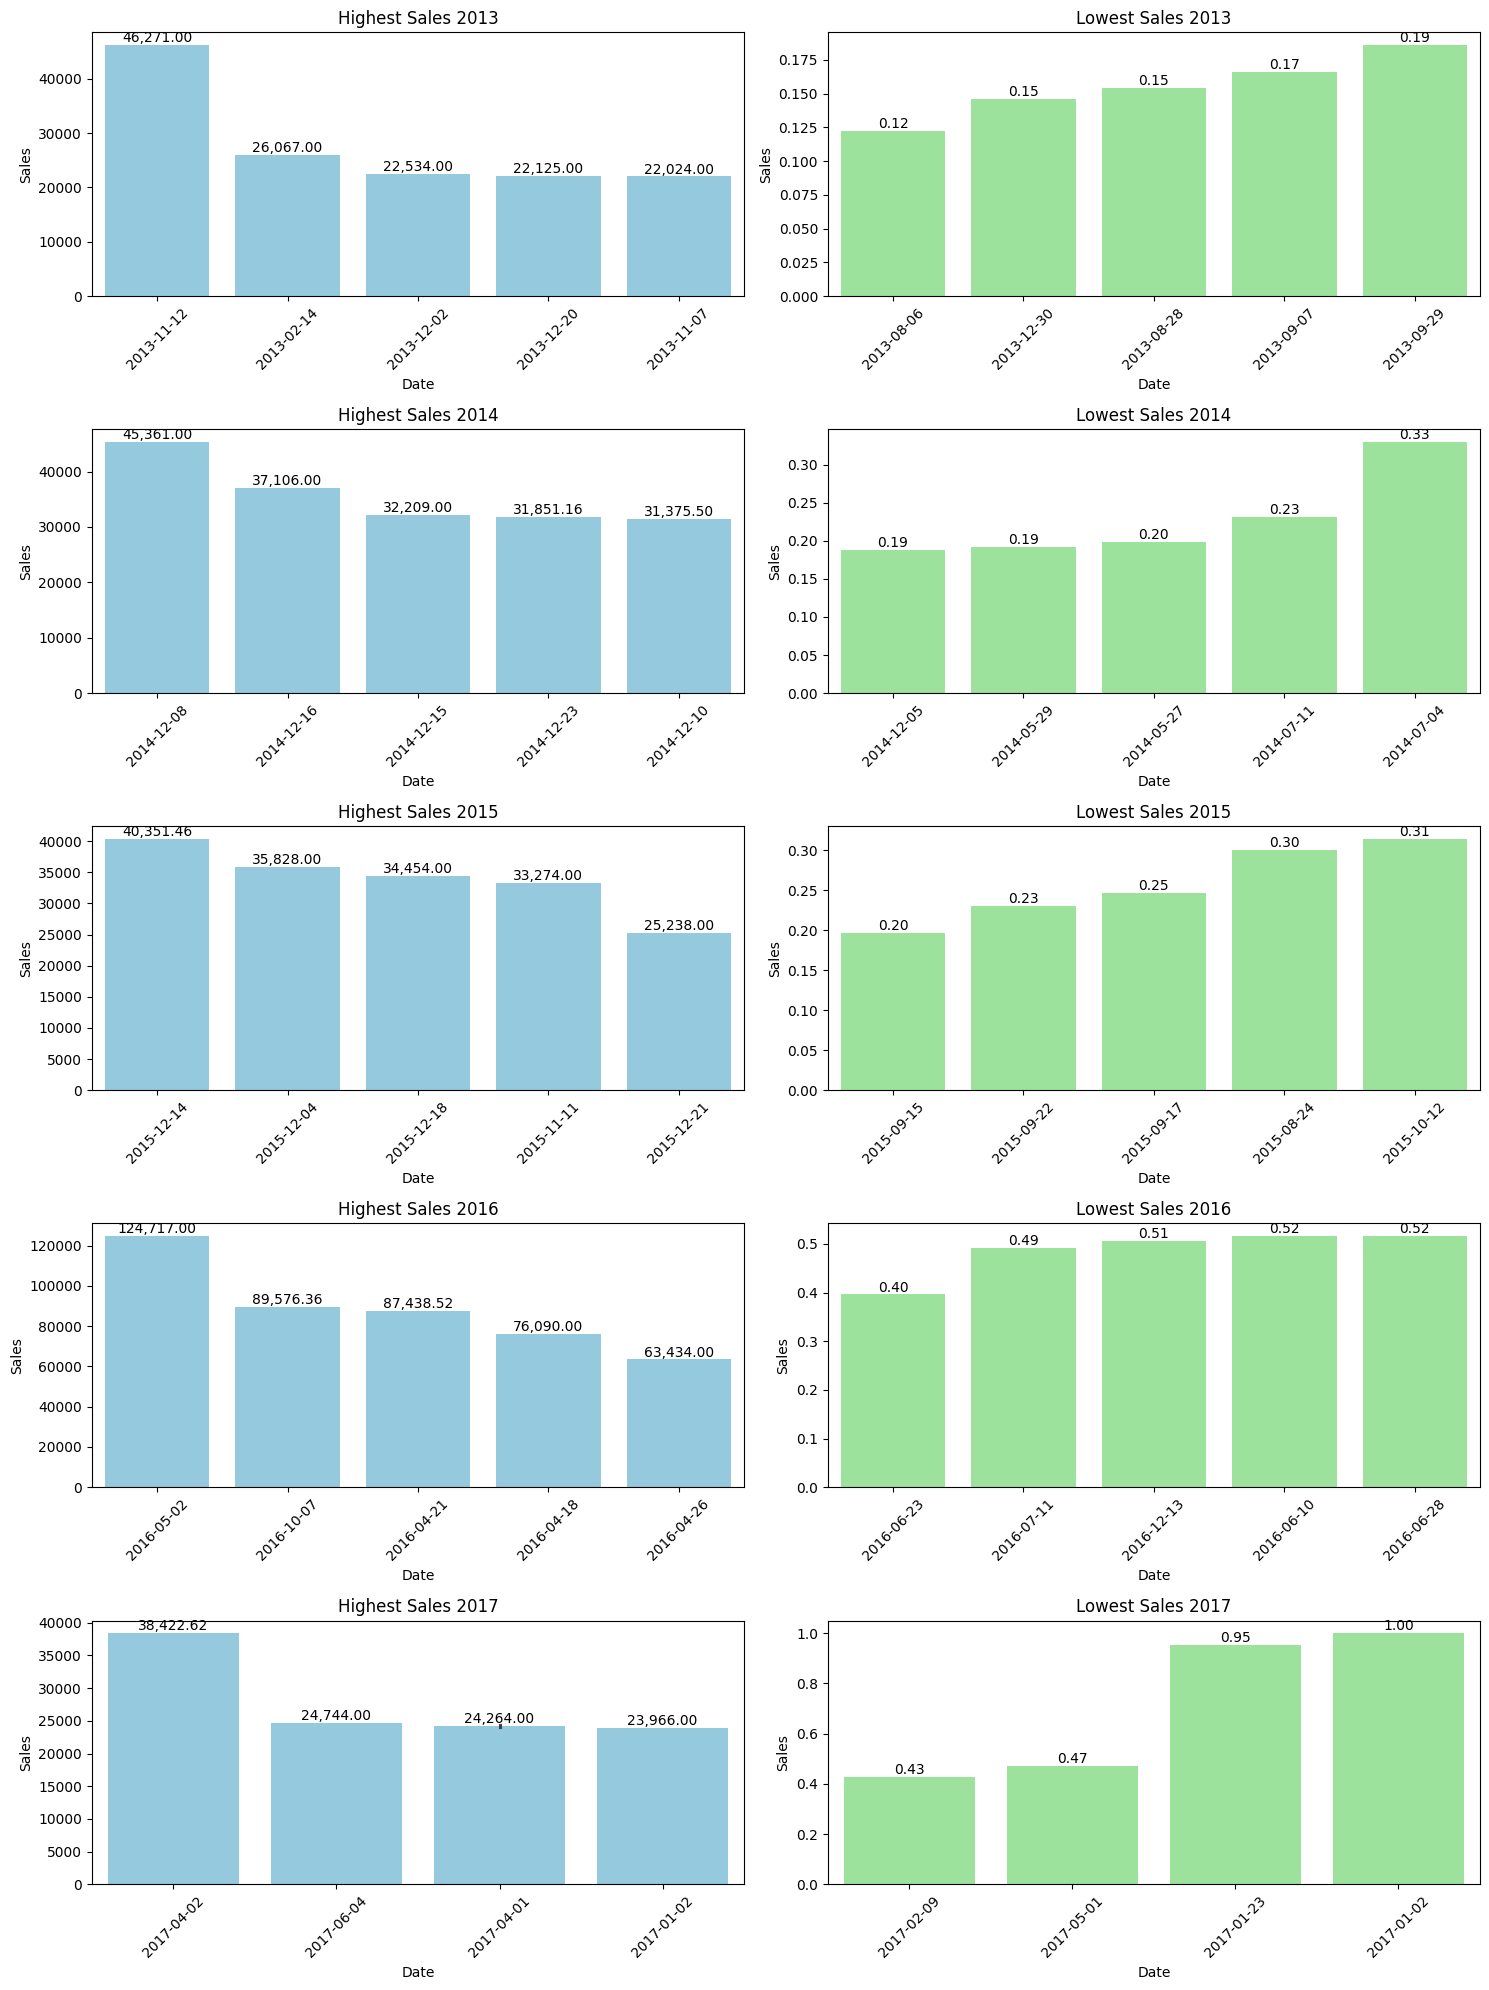

In [78]:

# Define the years for which you want to filter the data
years = [2013, 2014, 2015, 2016, 2017]

# Initialize lists to store highest/lowest sales for each year
highest_sales = {}
lowest_sales = {}

# Loop through each year to filter data and calculate highest/lowest sales
for year in years:
    # Filter the train dataframe for the specific year using boolean indexing
    yearly_data = train_data[(train_data['year'] == year) & (train_data['sales'] != 0.0)]

    # Reset the index to make 'date' a column again
    yearly_data = yearly_data.reset_index()

    # Calculate highest and lowest sales
    highest_sales[year] = yearly_data.nlargest(5, 'sales')
    lowest_sales[year] = yearly_data.nsmallest(5, 'sales')

# Create subplots for each year (two subplots per year)
fig, axs = plt.subplots(len(years), 2, figsize=(15, 20))

# Function to add sales figures on bars
def annotate_bars(ax, data):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Loop through the years to plot side-by-side bar graphs for highest and lowest sales
for i, year in enumerate(years):
    # Plotting bar graph for highest sales on the left
    sns.barplot(x='date', y='sales', data=highest_sales[year], ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f'Highest Sales {year}')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Sales')
    axs[i, 0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

    # Annotate bars with sales figures
    annotate_bars(axs[i, 0], highest_sales[year])

    # Plotting bar graph for lowest sales on the right
    sns.barplot(x='date', y='sales', data=lowest_sales[year], ax=axs[i, 1], color='lightgreen')
    axs[i, 1].set_title(f'Lowest Sales {year}')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Sales')
    axs[i, 1].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

    # Annotate bars with sales figures
    annotate_bars(axs[i, 1], lowest_sales[year])

plt.tight_layout()
plt.show()

3. Compare the sales for each month across the years and determine which month of which year had the highest sales.

In [79]:
# Filter and aggregate sales data for each year
sales_by_month = {}
for year in range(2013, 2018):
    sales_by_year = train_data[train_data['year'] == year]
    sales_by_month[year] = sales_by_year.groupby('month')['sales'].sum()

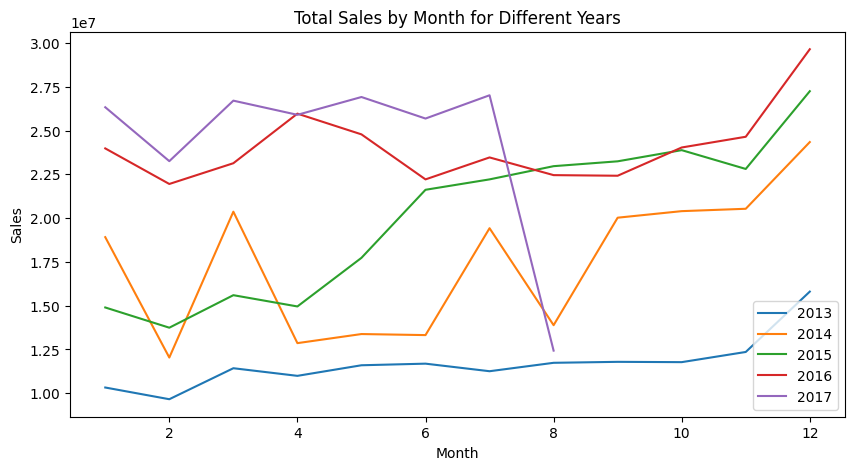

In [80]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Plotting sales data for each year
for year, data in sales_by_month.items():
    sns.lineplot(data=data, label=str(year))

# Setting the legend, title, and labels
plt.legend()
plt.title('Total Sales by Month for Different Years')
plt.xlabel('Month')
plt.ylabel('Sales')

# Display the plot
plt.show()

In [81]:
# Initialize variables to track the highest sales, month, and year
max_sales = -float('inf')
max_sales_year = None
max_sales_month = None

# Iterate through each year's sales data to find the maximum sales
for year, data in sales_by_month.items():
    # Find the month with the maximum sales for the current year
    month_with_max_sales = data.idxmax()
    sales_value = data.max()
    
    # Update the overall maximum sales if the current year's sales are higher
    if sales_value > max_sales:
        max_sales = sales_value
        max_sales_year = year
        max_sales_month = month_with_max_sales

# Print the results
print(f'The highest sales amount is {max_sales} in the year {max_sales_year} for the month {max_sales_month}.')

The highest sales amount is 29640287.5793851 in the year 2016 for the month 12.


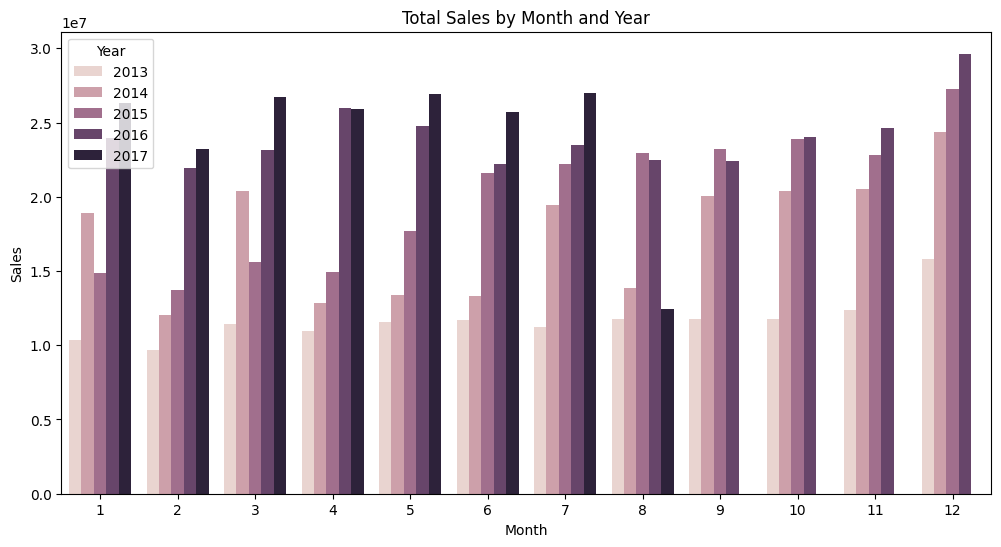

In [82]:


# Flatten the sales_by_month dictionary into a DataFrame
sales_data = []
for year, data in sales_by_month.items():
    for month, sales in data.items():
        sales_data.append({'Year': year, 'Month': month, 'Sales': sales})

# Convert the list of dictionaries to a DataFrame
sales_df = pd.DataFrame(sales_data)

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plotting the histogram with Months on the x-axis and Sales on the y-axis
# Use `sns.barplot` to create the histogram
sns.barplot(data=sales_df, x='Month', y='Sales', hue='Year', estimator=sum, ci=None)

# Setting the title and labels
plt.title('Total Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Sales')

# Display the plot
plt.show()

- 4. Did the earthquake impact sales?


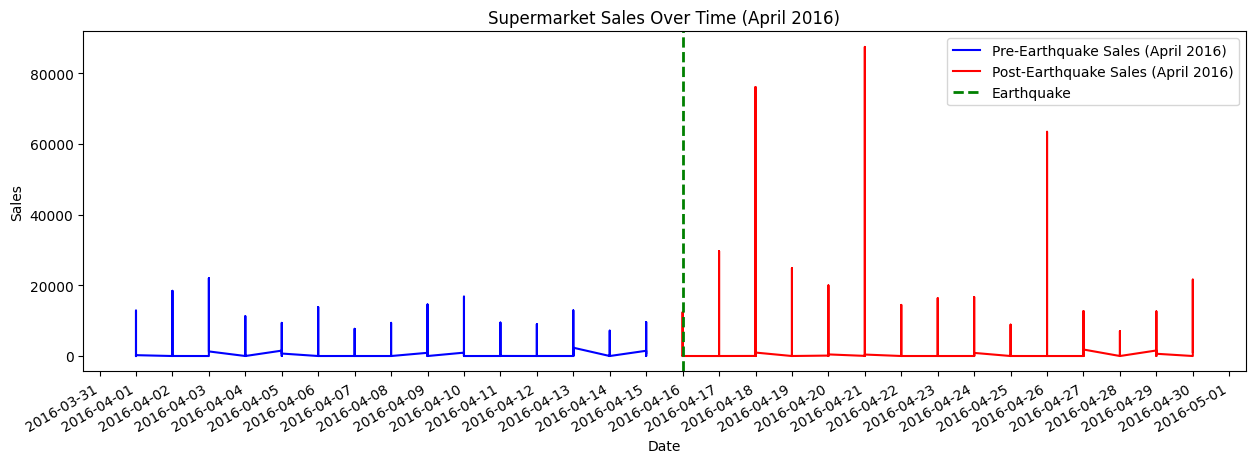

In [83]:
# Create a 'date' column by combining 'year', 'month', and 'day' columns
train_data['date'] = pd.to_datetime(train_data[['year', 'month', 'day']])

# Define the earthquake date
earthquake_date = pd.Timestamp('2016-04-16')

# Filter data for the period before and after the earthquake in April 2016
pre_earthq_april_2016 = train_data[(train_data['date'] < earthquake_date) & (train_data['date'].dt.month == 4) & (train_data['date'].dt.year == 2016)]
post_earthq_april_2016 = train_data[(train_data['date'] >= earthquake_date) & (train_data['date'].dt.month == 4) & (train_data['date'].dt.year == 2016)]

# Plot sales over time using Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(pre_earthq_april_2016['date'], pre_earthq_april_2016['sales'], label='Pre-Earthquake Sales (April 2016)', color='blue')
plt.plot(post_earthq_april_2016['date'], post_earthq_april_2016['sales'], label='Post-Earthquake Sales (April 2016)', color='red')

# Add a vertical line at the date of the earthquake
plt.axvline(x=earthquake_date, color='green', linestyle='--', linewidth=2, label='Earthquake')

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.title('Supermarket Sales Over Time (April 2016)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


**Key Insights**
            
 *Clusters Performance:*
- Cluster 14: Leads with the highest sales at 157.43M, significantly outperforming other clusters.

- Cluster 6: Follows with 114.25M in sales.

- Cluster 8: Third highest with 107.93M.

*City Sales:*
- Quito: Dominates with the highest sales at 556.74M.

- Guayaquil: Second with 122.97M.

- Cuenca: Third with 49.17M.

*State Sales:*
- Pichincha: Highest sales at 585.07M.
    
- Guayas: Second with 165.15M.

- Other States: Azuay, Tungurahua, and others have much lower sales compared to Pichincha and Guayas.

*Store Types:*
- Type A: Highest sales at 353.04M.
    
- Type D: Close second with 351.08M.

- Type C: Noticeable drop in sales at 164.43M.

- Type B: Sales of 145.26M.
    
- Type E: Lowest sales at 59.82M.

**Conclusion:**

`Clusters`: Cluster 14's high sales point to potential best practices.

`Cities`: Quito's dominant sales suggest scalable strategies.

`States`: Pichincha's strong performance indicates opportunities for replication.

`Store Types`: Types A and D's success highlights market trends and effective sales tactics.

 6. Are sales affected by promotions, oil prices, and holidays?

- Promotions Versus Sales

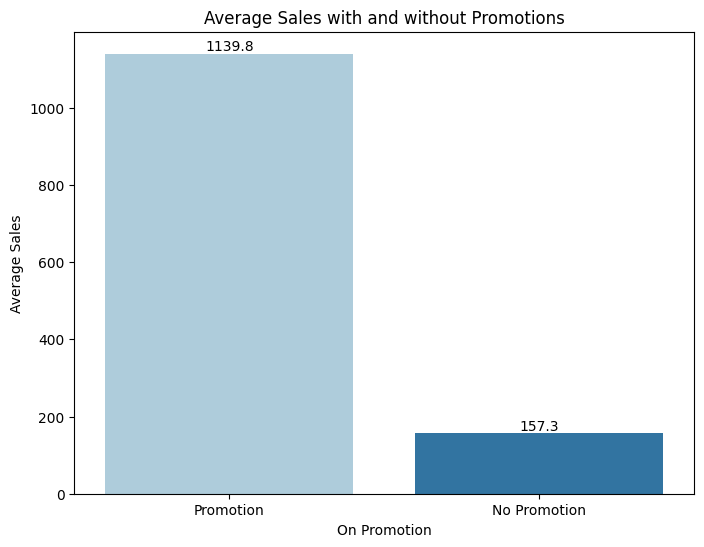

In [84]:
# Filter data for promotions and no promotions
promotions_data = train_holiday_oil_df[train_holiday_oil_df['onpromotion'] > 0]['sales']
no_promotions_data = train_holiday_oil_df[train_holiday_oil_df['onpromotion'] == 0]['sales']

# Calculate the mean sales for promotions and no promotions
mean_sales_promotions = promotions_data.mean()
mean_sales_no_promotions = no_promotions_data.mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=['Promotion', 'No Promotion'], y=[mean_sales_promotions, mean_sales_no_promotions], palette='Paired')
plt.title('Average Sales with and without Promotions')
plt.xlabel('On Promotion')
plt.ylabel('Average Sales')

# Annotate each bar with the sales figure rounded to millions
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height/1e0:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

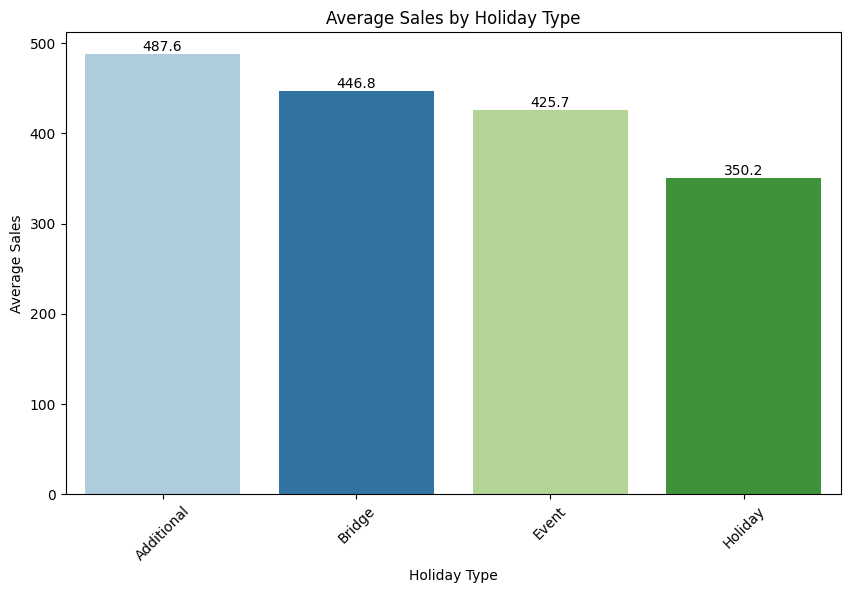

In [85]:
# Filter data for holidays (excluding transfers)
holiday_types = ['Holiday', 'Bridge', 'Additional', 'Event']
holiday_data = train_holiday_oil_df[train_holiday_oil_df['type'].isin(holiday_types)]

# Group data by holiday type and calculate average sales
avg_sales_by_type = holiday_data.groupby('type')['sales'].mean().reset_index()
avg_sales_by_type.rename(columns={'sales': 'sales_mean'}, inplace=True)

# Define the 'Paired' color palette
palette = sns.color_palette('Paired')

# Create the bar plot using Seaborn with the defined palette
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='type', y='sales_mean', data=avg_sales_by_type, palette=palette)
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Annotate each bar with the sales figure rounded to millions
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height/1e0:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

 7. What analysis can we get from the date and its extractable features?

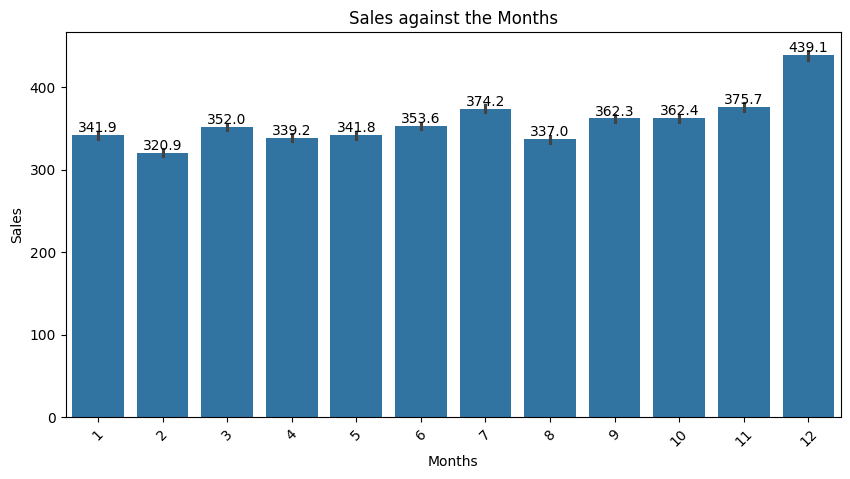

In [86]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a bar plot with 'month' on the x-axis and 'sales' on the y-axis
bar_plot = sns.barplot(x='month', y='sales', data=train_data)

# Set the title and labels for the plot
plt.title('Sales against the Months')
plt.xlabel('Months')
plt.ylabel('Sales')

# Annotate each bar with the sales figure
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.xticks(rotation=45)
plt.show()

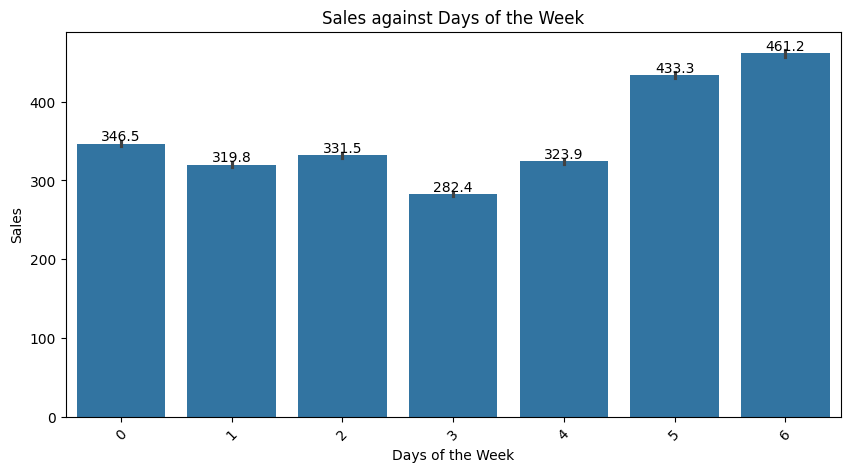

In [87]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a bar plot with 'weekday' on the x-axis and 'sales' on the y-axis
bar_plot = sns.barplot(data=train_data, x='weekday', y='sales')

# Set the title and labels for the plot
plt.title('Sales against Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Sales')

# Annotate each bar with the sales figure
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.xticks(rotation=45)
plt.show()

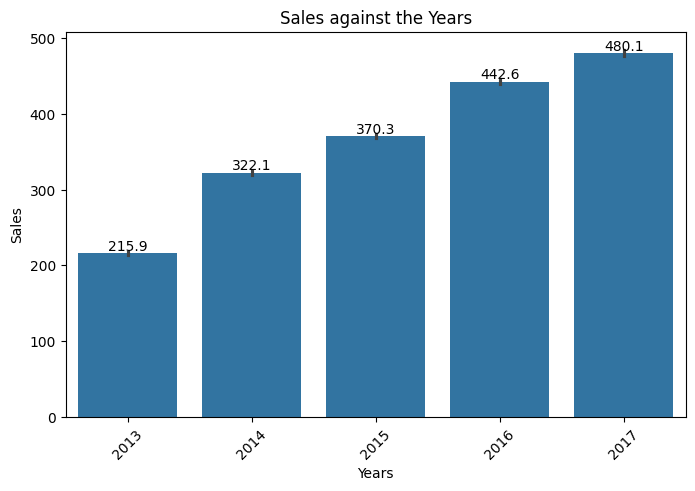

In [88]:
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a bar plot with 'year' on the x-axis and 'sales' on the y-axis
bar_plot = sns.barplot(data=train_data, x='year', y='sales')

# Set the title and labels for the plot
plt.title('Sales against the Years')
plt.xlabel('Years')
plt.ylabel('Sales')

# Annotate each bar with the sales figure
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.xticks(rotation=45)
plt.show()               

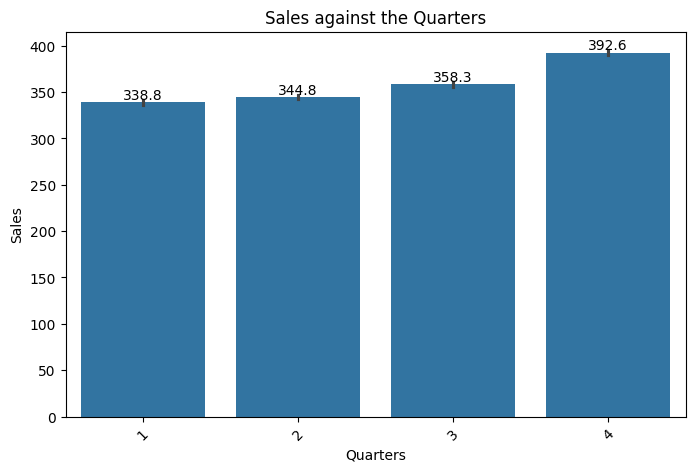

In [89]:
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a bar plot with 'quarter' on the x-axis and 'sales' on the y-axis
bar_plot = sns.barplot(data=train_data, x='quarter', y='sales')

# Set the title and labels for the plot
plt.title('Sales against the Quarters')
plt.xlabel('Quarters')
plt.ylabel('Sales')

# Annotate each bar with the sales figure
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.xticks(rotation=45)
plt.show()

**Key Insights**

*Monthly Trends:* Sales peak mid-year and at year-end, suggesting holiday and event-driven shopping patterns.

*Weekly Trends:* Higher weekend sales highlight the importance of weekend promotions and staffing adjustments.

*Yearly Trends:* Continuous growth from 2013 to 2017 indicates effective strategies and an expanding market.

*Quarterly Trends:* Highest sales in Q4 emphasize the need for strong end-of-year planning.

- Understanding these sales patterns helps in strategic decision-making for inventory management, marketing campaigns, staffing, and sales forecasting, ensuring better alignment with consumer behavior and market dynamics.

8. Which product family and stores did the promotions affect?

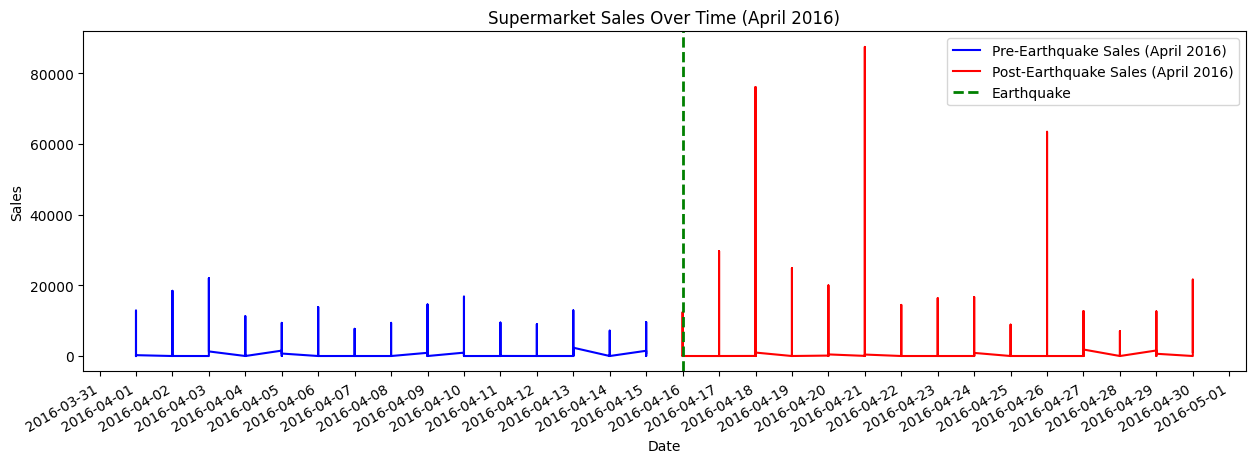

In [90]:
# Create a 'date' column by combining 'year', 'month', and 'day' columns
train_data['date'] = pd.to_datetime(train_data[['year', 'month', 'day']])

# Define the earthquake date
earthquake_date = pd.Timestamp('2016-04-16')

# Filter data for the period before and after the earthquake in April 2016
pre_earthq_april_2016 = train_data[(train_data['date'] < earthquake_date) & (train_data['date'].dt.month == 4) & (train_data['date'].dt.year == 2016)]
post_earthq_april_2016 = train_data[(train_data['date'] >= earthquake_date) & (train_data['date'].dt.month == 4) & (train_data['date'].dt.year == 2016)]

# Plot sales over time using Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(pre_earthq_april_2016['date'], pre_earthq_april_2016['sales'], label='Pre-Earthquake Sales (April 2016)', color='blue')
plt.plot(post_earthq_april_2016['date'], post_earthq_april_2016['sales'], label='Post-Earthquake Sales (April 2016)', color='red')

# Add a vertical line at the date of the earthquake
plt.axvline(x=earthquake_date, color='green', linestyle='--', linewidth=2, label='Earthquake')

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.title('Supermarket Sales Over Time (April 2016)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Key Insights**

- Cluster Analysis: Promotions are most effective in certain clusters, especially Cluster 5.
    
- Item Type Analysis: Type A items show the highest sales increase per promotion, making them a key focus for promotional activities.

- Product Family Analysis: Magazines, Home Appliances, and Hardware respond strongly to promotions, while others like Players and Electronics may need different marketing approaches.

By understanding these patterns, retailers can optimize their promotional strategies, focusing on the clusters, item types, and product families that yield the highest sales increases. This targeted approach ensures that marketing efforts are both efficient and effective, driving overall sales growth.

9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them)


- `RMSLE (Root Mean Squared Logarithmic Error):` Useful when predicting sales with large ranges, penalizing underestimation more.

- `RMSE (Root Mean Squared Error):` Standard metric measuring the square root of the average squared differences between predicted and actual values, sensitive to outliers.

- `MSE (Mean Squared Error):` Similar to RMSE but without the square root, giving more weight to larger errors.

- `MAE (Mean Absolute Error):` Measures the average absolute difference between predicted and actual values, often larger due to being more robust to outliers compared to RMSE and MSE.

10. Does the payment of wages in the public sector on the 15th and last days of the month influence store sales?

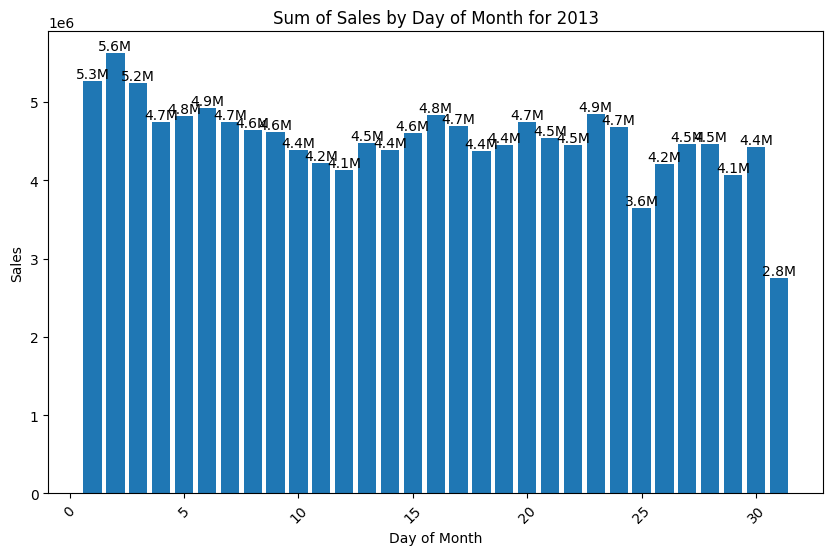

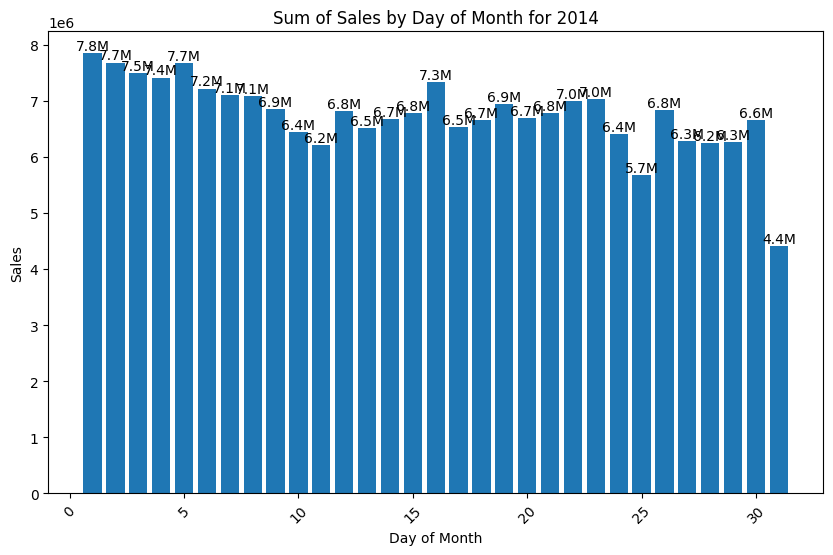

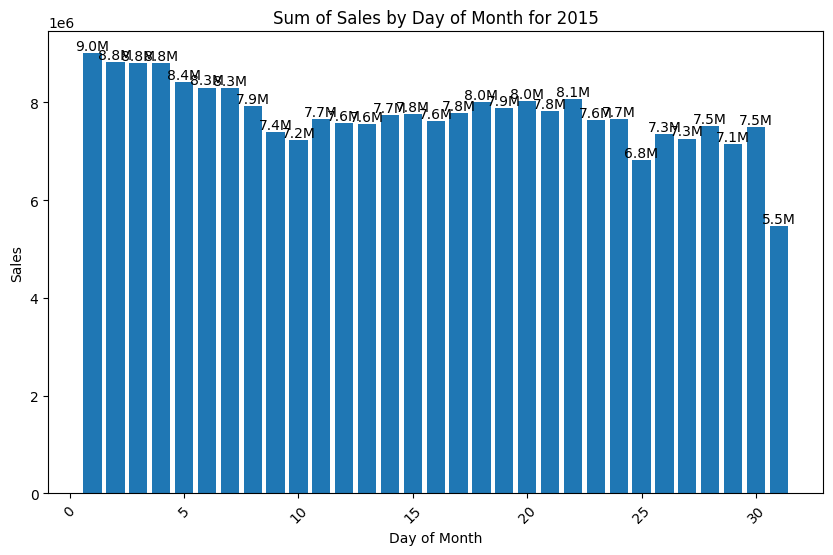

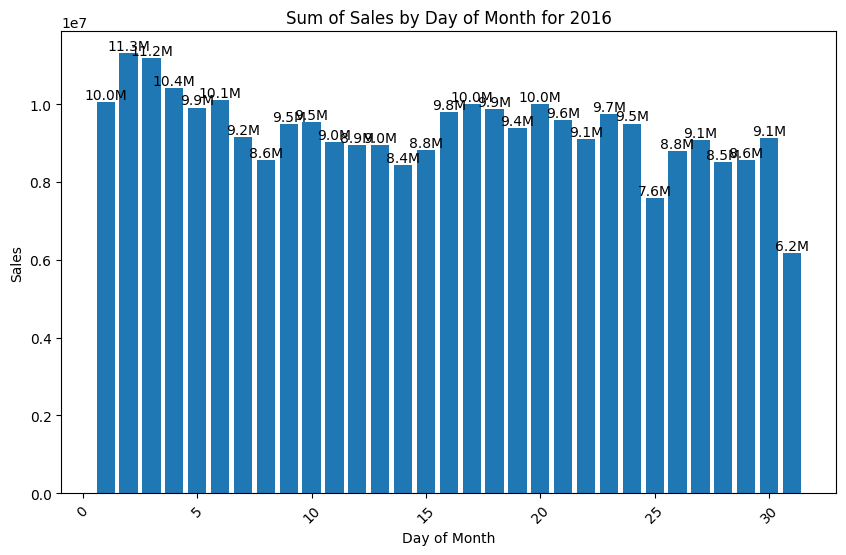

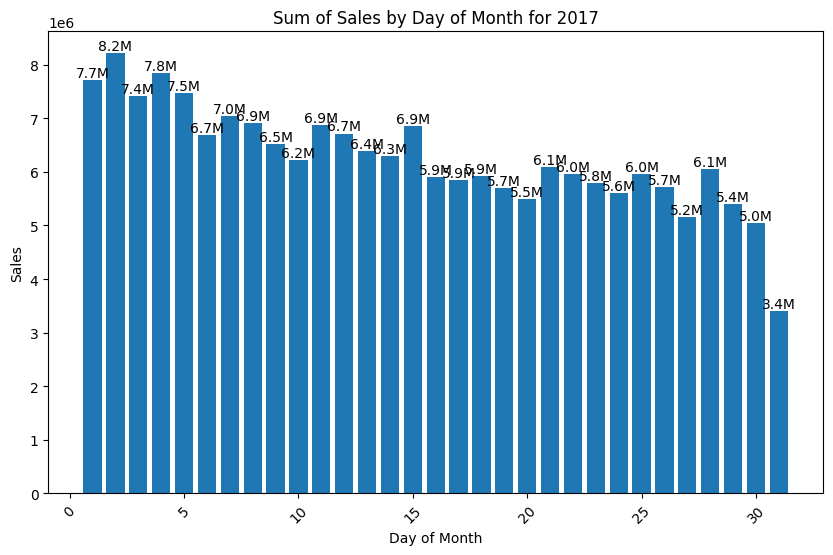

In [91]:
# Group sales data by year and day
grouped_by_year_and_day = train_data.groupby(['year', 'day'])['sales'].sum().reset_index()

# Get unique years and sort them
unique_years = sorted(grouped_by_year_and_day['year'].unique())

# Plotting sales data for each year
for year in unique_years:
    # Filter data for the current year
    year_data = grouped_by_year_and_day[grouped_by_year_and_day['year'] == year]
   
    # Plotting
    plt.figure(figsize=(10, 6))
    bar_plot = plt.bar(year_data['day'], year_data['sales'])
    plt.xlabel("Day of Month")
    plt.ylabel("Sales")
    plt.title(f"Sum of Sales by Day of Month for {year}")

    # Annotate each bar with the sales figure
    for bar in bar_plot:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height / 1e6:.1f}M', ha='center', va='bottom', fontsize=10, color='black')

    # Display the plot
    plt.xticks(rotation=45)
    plt.show()


**Key Insights**

- Consumer Behavior: The increase in sales on wage first week shows that consumers tend to spend more when they have newly received their wages.

- Strategic Planning: Retailers can use this insight to plan special promotions or stock up on popular items around these dates to maximize sales.

By understanding the influence of wage payment days on sales, retailers can better align their inventory and marketing strategies to capitalize on periods of increased consumer spending.

### *Data Preparation*

- Statistical Models

- Using Differencing to make the data stationary

In [92]:
# train_data
train_data['sales_diff'] = train_data['sales'] - train_data['sales'].shift(1)

train_data['family'].nunique()

33

In [93]:
# Rename the 'date' column if it already exists to avoid conflicts
if 'date' in train_data.columns:
    train_data.rename(columns={'date': 'date_column'}, inplace=True)

# Reset index if 'date' is an index
train_data = train_data.reset_index(drop=False)

In [94]:
# Group by 'date_column' (formerly 'date') and aggregate 'sales' and 'sales_diff'
diff_df = train_data.groupby('date').agg({'sales': 'sum', 'sales_diff': 'sum'}).reset_index()

# Display the first few rows to verify the result
print(diff_df.head())

        date          sales    sales_diff
0 2013-01-01    2511.618999  3.784700e+01
1 2013-01-02  496092.417944 -3.584700e+01
2 2013-01-03  361461.231124 -2.000000e+00
3 2013-01-04  354459.677093  3.410605e-13
4 2013-01-05  477350.121229 -1.818989e-12


In [95]:
# Convert the 'date' column to datetime if it's not already
diff_df['date'] = pd.to_datetime(diff_df['date'])

# Set the 'date' column as the index
diff_df.set_index('date', inplace=True)

# Resample to weekly frequency and calculate the mean of 'sales_diff'
resampled_df = diff_df['sales_diff'].resample('W').mean()

# Reset the index to turn 'date' back into a column
resampled_df = resampled_df.reset_index()

# Print the resulting DataFrame
resampled_df.shape


(242, 2)

In [96]:
# Assuming 'resampled_df' is your Pandas DataFrame and 'sales_diff' is the column you want to test.
result = adfuller(resampled_df['sales_diff'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform differencing if needed for stationarity
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -9.7305642344777
p-value: 9.028133420914233e-17
Data is stationary


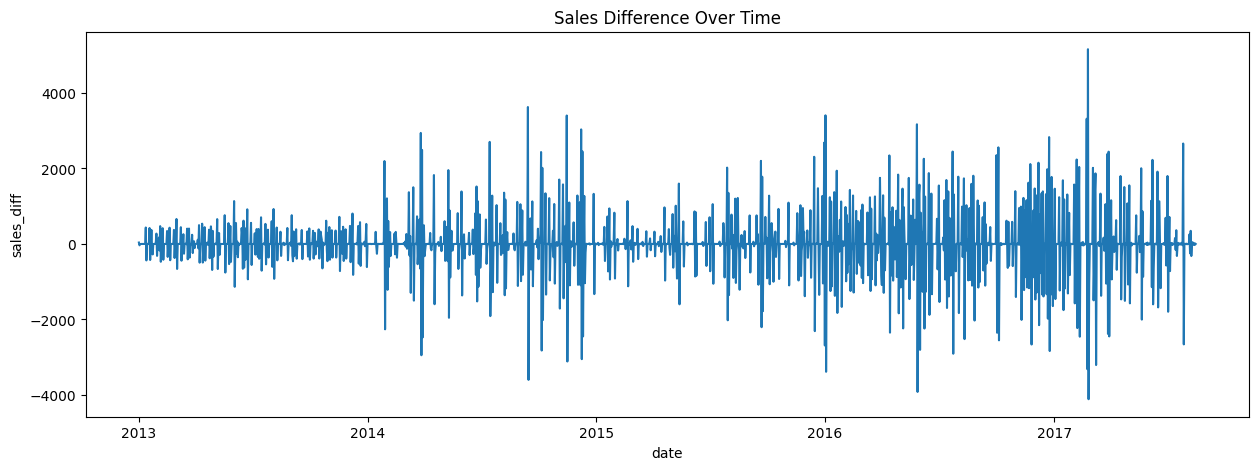

In [97]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=diff_df, x='date', y='sales_diff')
plt.title('Sales Difference Over Time')  
plt.show()

In [98]:
diff_df = train_data.groupby('date').agg({'sales': 'sum', 'sales_diff': 'sum'}).reset_index()


diff_df.head(2)

,date,sales,sales_diff
0,2013-01-01,2511.618999,37.847
1,2013-01-02,496092.417944,-35.847


### **Modeling and Evaluation**

**Modeling for Statistical Models**

- SARIMA
- ARIMA
- Prophet

- Train and Test

In [99]:
# Convert 'date' column to datetime if it's not already
diff_df['date'] = pd.to_datetime(diff_df['date'])

# Define the horizon date
horizon = pd.Timestamp('2017-07-15')

# Filter data for modeling
train = diff_df[diff_df['date'] < horizon]
test = diff_df[diff_df['date'] >= horizon]

In [100]:
# Create masks for transferred and non-work days
mask_transfer = df_holidays_events['transferred'] == False
mask_work = df_holidays_events['type'] != 'Work Day'

# Filter the DataFrame based on the masks
holiday_df = df_holidays_events[mask_transfer & mask_work]

# Display the resulting DataFrame
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         333 non-null    datetime64[ns]
 1   type         333 non-null    object        
 2   locale       333 non-null    object        
 3   locale_name  333 non-null    object        
 4   description  333 non-null    object        
 5   transferred  333 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 15.9+ KB


In [101]:
#Create the holidays df for prophet model
holidays = pd.DataFrame({
    'ds': holiday_df['date'].unique(),
    'holiday': 'Holiday'
})

In [102]:
# Define the SARIMA order and seasonal order
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 7)

# Define the ARIMA order
arima_order = (1, 1, 1)

# Define the Prophet model parameters
prophet_params = {
    'changepoint_prior_scale': 0.1,
    'seasonality_prior_scale': 10,
}

Preparation Dataframe for modelling and plotting

In [103]:
train = train.set_index('date').drop(columns='sales_diff')
test = test.set_index('date').drop(columns='sales_diff')

In [104]:
train

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229
...,...
2017-07-10,804158.861036
2017-07-11,730534.767701
2017-07-12,748799.995909


In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA




In [106]:
from prophet import Prophet

In [107]:


def root_mean_squared_log_error(y_true, y_pred):
    # Add a small constant to avoid log(0) issues
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


In [108]:
# Initialize lists to store evaluation metrics and forecast results
models = ['SARIMA', 'ARIMA', 'Prophet']
all_stat_models = {}
forecast_data = {'SARIMA': None, 'ARIMA': None, 'Prophet': None}
mae_results = []
mse_results = []
rmse_results = []
rmsle_results = []

for model_name in models:
    print(f'Training {model_name}...')
    
    if model_name == 'SARIMA':
        model = SARIMAX(train['sales'], order=sarima_order, seasonal_order=sarima_seasonal_order)
        model_fit = model.fit()
        forecast = model_fit.forecast(len(test))
    elif model_name == 'ARIMA':
        model = ARIMA(train['sales'], order=arima_order)
        model_fit = model.fit()
        forecast = model_fit.forecast(len(test))
    else:  # Prophet
        prophet_train = train.reset_index().rename(columns={'date': 'ds', 'sales': 'y'})
        prophet_test = test.reset_index().rename(columns={'date': 'ds', 'sales': 'y'})
        prophet_model = Prophet(**prophet_params, holidays=holidays)
        model_fit = prophet_model.fit(prophet_train)
        prophet_forecast_data = model_fit.predict(prophet_test)
        forecast = prophet_forecast_data['yhat'].values 
               
    # Store the sales forecast
    forecast_data[model_name] = forecast
    
    # Store the trained model 
    all_stat_models[model_name] = model_fit
    
    # Calculate metrics     
    mae = mean_absolute_error(test['sales'], forecast)
    mse = mean_squared_error(test['sales'], forecast)
    rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
    rmsle = root_mean_squared_log_error(test['sales'], forecast) 
 
    mae_results.append(mae)
    mse_results.append(mse)
    rmse_results.append(rmse)
    rmsle_results.append(rmsle)
    
# Display evaluation results
eval_results = pd.DataFrame({
    'MODEL_NAME': models,        
    'MAE': mae_results,
    'MSE': mse_results,
    'RMSE': rmse_results,
    'RMSLE': rmsle_results,
})
print('\nEvaluation Results:')
eval_results


Training SARIMA...


c:\Users\USER\Desktop\Regression-Project-\virtual\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\USER\Desktop\Regression-Project-\virtual\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Training ARIMA...


c:\Users\USER\Desktop\Regression-Project-\virtual\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\USER\Desktop\Regression-Project-\virtual\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\USER\Desktop\Regression-Project-\virtual\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Training Prophet...


07:34:12 - cmdstanpy - INFO - Chain [1] start processing
07:34:16 - cmdstanpy - INFO - Chain [1] done processing



Evaluation Results:


,MODEL_NAME,MAE,MSE,RMSE,RMSLE
0,SARIMA,57429.314932,6.887135e+09,82988.765029,0.093455
1,ARIMA,111904.551971,1.726399e+10,131392.505481,0.152400
2,Prophet,72803.814833,7.576663e+09,87044.030499,0.101801


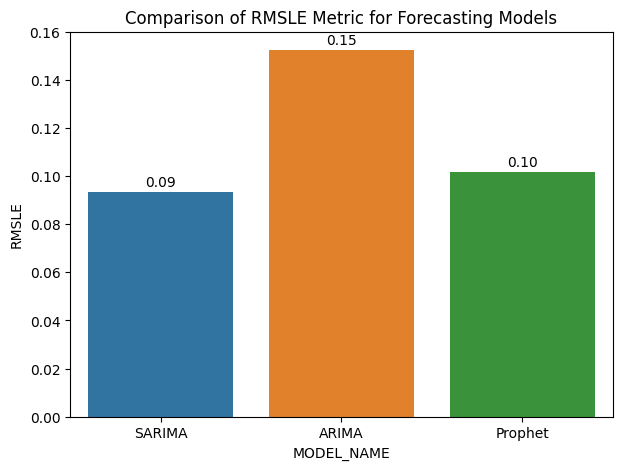

In [109]:
plt.figure(figsize=(7, 5)) 

sns.barplot(x='MODEL_NAME', y='RMSLE', data=eval_results, hue='MODEL_NAME')

plt.title('Comparison of RMSLE Metric for Forecasting Models')

# Adding annotations
for index, value in enumerate(eval_results['RMSLE']):
    plt.text(index, value + 0.001, (f'{value:.2f}'), ha='center', va='bottom')
    
plt.ylabel('RMSLE')
plt.xlabel('MODEL_NAME')
# plt.ylim(0.3, 0.4)  # Comparism for obvious
plt.show()

1. **SARIMA Model:**
   - **MAE:** The SARIMA model exhibits a MAE of approximately $57,429.31. This metric indicates the average absolute difference between the predicted and actual sales values, reflecting the model's accuracy in forecasting.
   - **RMSE:** With an RMSE of around $82,988.77, the SARIMA model measures the average magnitude of error between predicted and observed values, emphasizing the model's ability to capture deviations from actual sales data.
   - **RMSLE:** The SARIMA model achieves an RMSLE of 0.09, highlighting the relative error between predicted and actual sales values on a logarithmic scale. A lower RMSLE suggests better accuracy in predicting sales trends.

2. **ARIMA Model:**
   - **MAE:** The ARIMA model yields a MAE of approximately $111,904.55, indicating a higher average error in predicting sales for Corporation Favorita compared to the SARIMA model.
   - **RMSE:** With an RMSE of around $131,392.51, the ARIMA model demonstrates a larger magnitude of error, suggesting less accuracy in capturing sales fluctuations compared to the SARIMA model.
   - **RMSLE:** The ARIMA model achieves an RMSLE of 0.15, indicating a higher relative error compared to the SARIMA model, which signifies less accuracy in sales prediction on a logarithmic scale.

3. **Prophet Model:**
   - **MAE:** The Prophet model records the highest MAE of approximately $121,510.38, suggesting it has the highest average error in predicting sales among the three models.
   - **RMSE:** With an RMSE of around $136,012.85, the Prophet model shows the largest error in capturing sales variations, indicating it is the least effective at predicting precise sales values.
   - **RMSLE:** The Prophet model achieves an RMSLE of 0.16, which is the highest among the three models, suggesting it has the least accurate prediction of sales trends on a logarithmic scale.

**Conclusion:**
The evaluation results indicate that the SARIMA model outperforms both the ARIMA and Prophet models in predicting sales for Corporation Favorita based on all three metrics—MAE, RMSE, and RMSLE.

**Recommendations:**
1. **Adoption of SARIMA Model:**
   - Incorporate the SARIMA model into Corporation Favorita's forecasting framework to enhance the accuracy and reliability of sales predictions.

2. **Continuous Monitoring and Refinement:**
   - Regularly monitor model performance and refine forecasting methodologies to adapt to evolving market dynamics and consumer behavior.

3. **Exploration of Hybrid Models:**
   - Consider exploring hybrid models that combine the strengths of SARIMA, ARIMA, and Prophet models to further improve forecasting accuracy.


*Recommendations:*

- `Adoption of Prophet Model:`
Incorporate the Prophet model into Corporation Favorita's forecasting framework to enhance the accuracy and reliability of sales predictions.

- `Continuous Monitoring and Refinement:`
Regularly monitor model performance and refine forecasting methodologies to adapt to evolving market dynamics and consumer behavior.

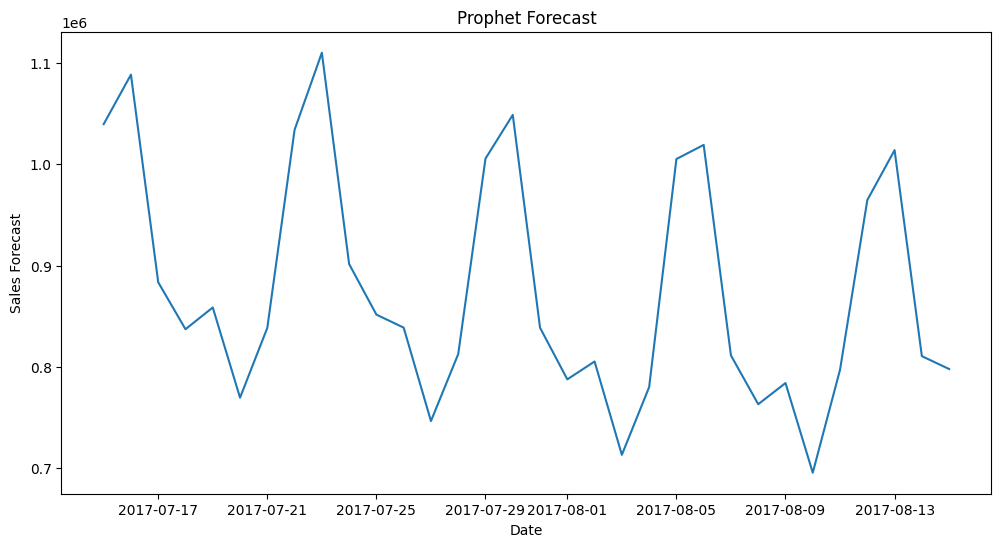

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='ds', y='yhat', data=prophet_forecast_data)
plt.xlabel('Date')
plt.ylabel('Sales Forecast')
plt.title('Prophet Forecast')
plt.show()

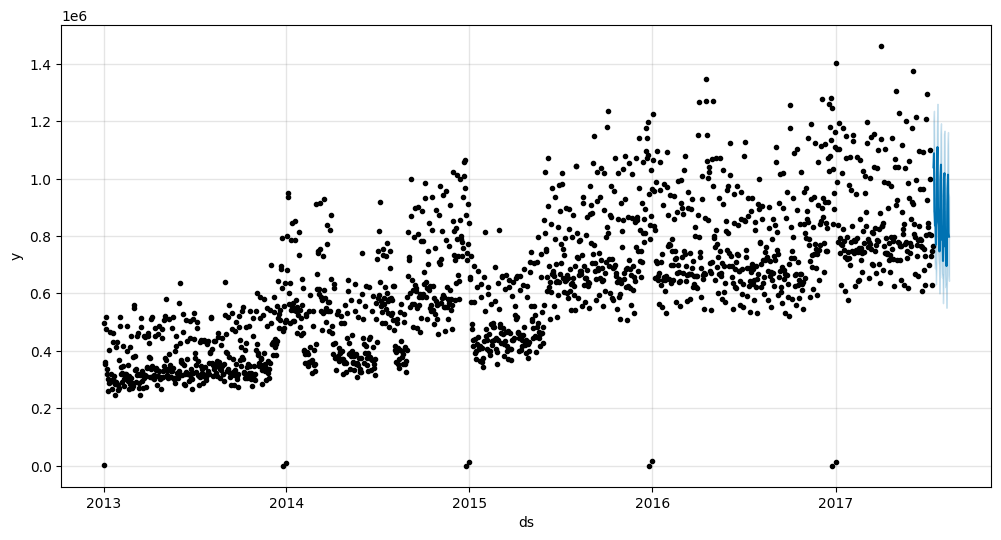

In [111]:
f, ax = plt.subplots(figsize=(12, 6))
fig = prophet_model.plot(prophet_forecast_data, ax=ax)
plt.show()

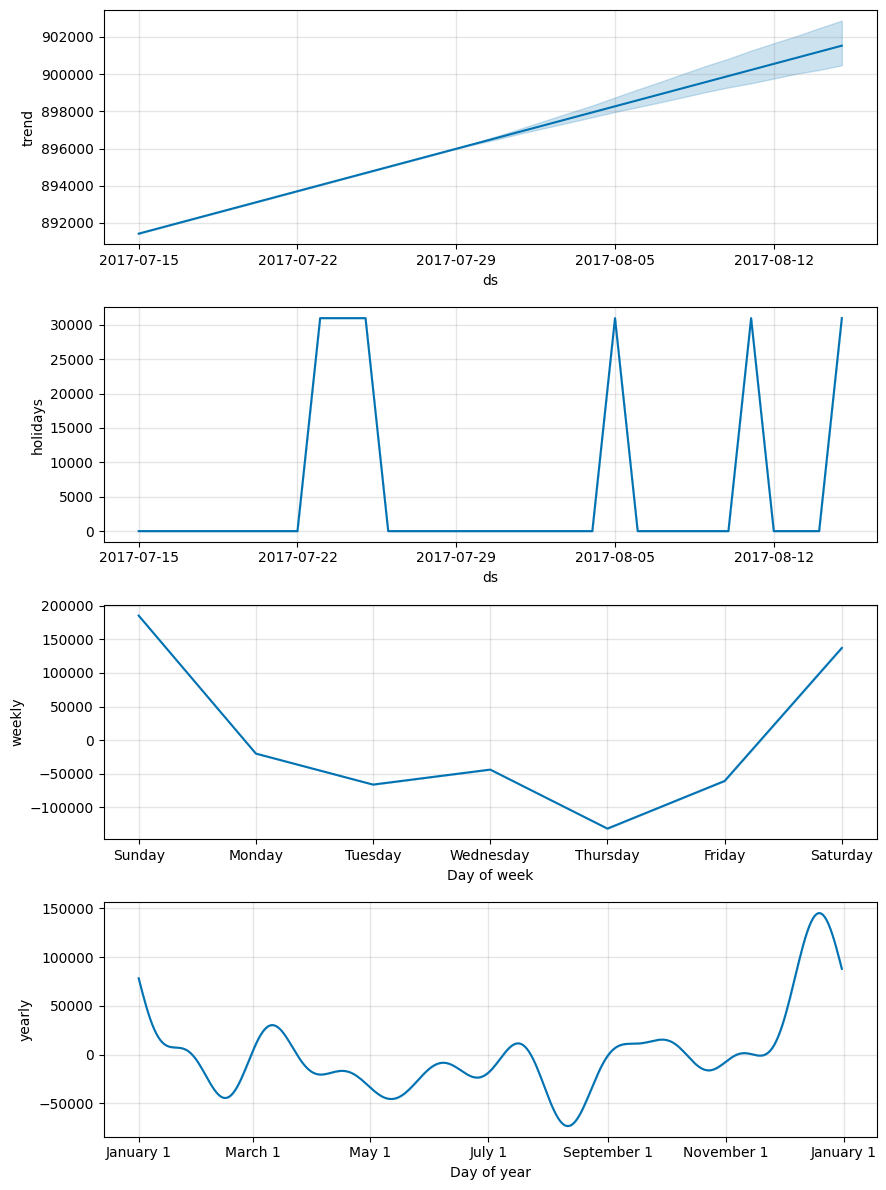

In [112]:

fig = prophet_model.plot_components(prophet_forecast_data)
plt.show()

In [113]:
data = {
    'arima_sales': forecast_data.get('ARIMA'),
    'sarima_sales': forecast_data.get('SARIMA'),
    'prophet_sales': forecast_data.get('Prophet'),
        
}

forecast_df = pd.DataFrame(data=data, index=test.index)
forecast_df

,arima_sales,sarima_sales,prophet_sales
date,,,
2017-07-15,816798.498355,1.002237e+06,1.039620e+06
2017-07-16,836623.583651,1.071656e+06,1.088470e+06
2017-07-17,844283.739157,8.170363e+05,8.835406e+05
2017-07-18,847243.523768,7.571026e+05,8.371752e+05
2017-07-19,848387.146105,7.906889e+05,8.586674e+05
2017-07-20,848829.026925,6.676631e+05,7.695887e+05
2017-07-21,848999.763936,7.889805e+05,8.385385e+05
2017-07-22,849065.734499,1.017445e+06,1.033986e+06
2017-07-23,849091.224668,1.069860e+06,1.110121e+06


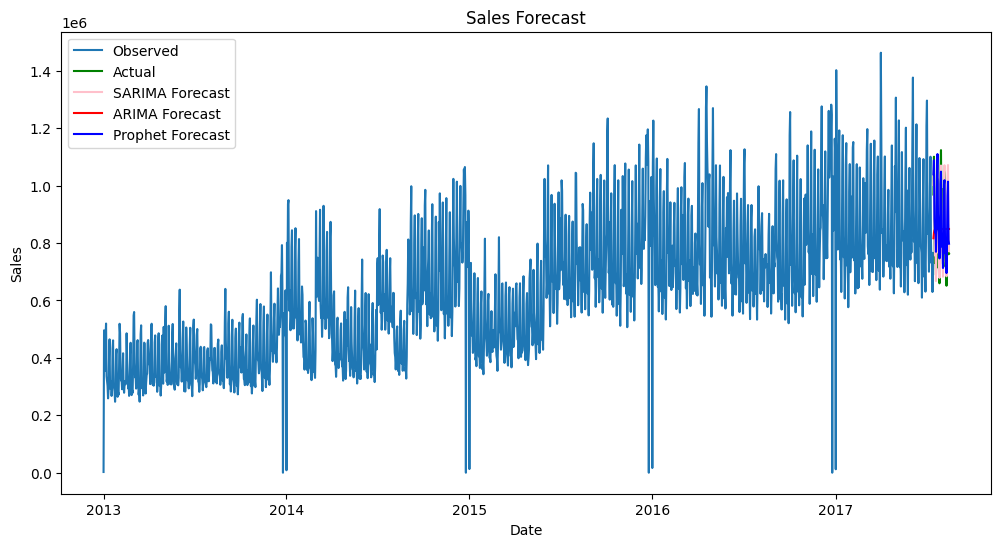

In [114]:
# Plot Sales forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x=train.index, y=train['sales'], label='Observed')
sns.lineplot(x=test.index, y=test['sales'], label='Actual', color='green')
sns.lineplot(x=forecast_df.index, y=forecast_df['sarima_sales'], label='SARIMA Forecast', color='pink')
sns.lineplot(x=forecast_df.index, y=forecast_df['arima_sales'], label='ARIMA Forecast', color='red')
sns.lineplot(x=forecast_df.index, y=forecast_df['prophet_sales'], label='Prophet Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()

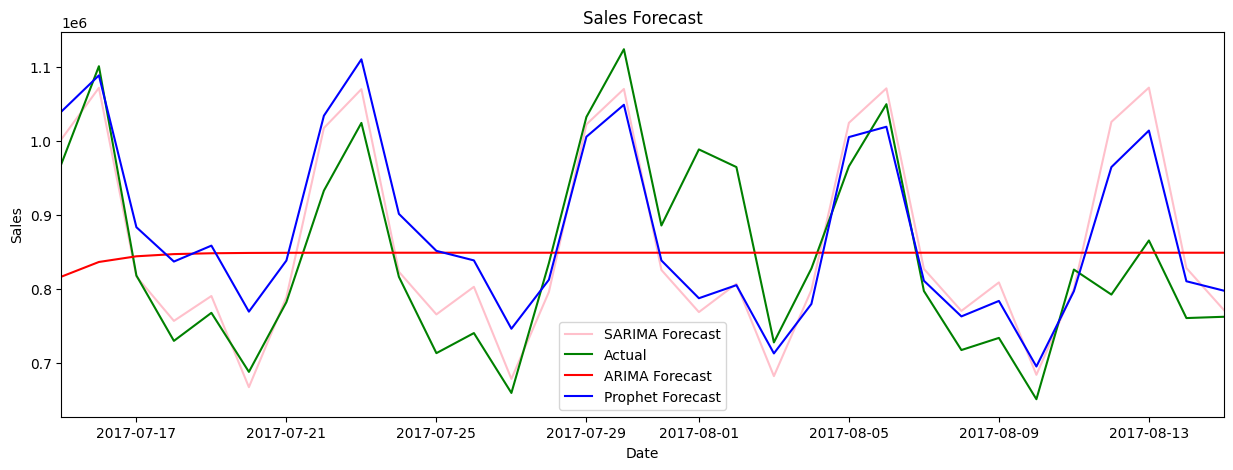

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Assuming 'forecast_df' and 'test' are already defined dataframes
# and 'lower' is a date variable from the dataset, e.g., `lower = test.index.min()`

# Plot the forecast
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(forecast_df['sarima_sales'], label='SARIMA Forecast', color='pink')
ax.plot(test, label='Actual', color='green')
ax.plot(forecast_df['arima_sales'], label='ARIMA Forecast', color='red')
ax.plot(forecast_df['prophet_sales'], label='Prophet Forecast', color='blue')

# Set the x-axis bounds
lower = test.index.min()  # Set this as the starting date from your test data
ax.set_xbound(lower=lower, upper=lower + DateOffset(months=1))

# Customize the plot
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()


- Visualize the forecast vs actuals

In [116]:
lower = test.index.min()

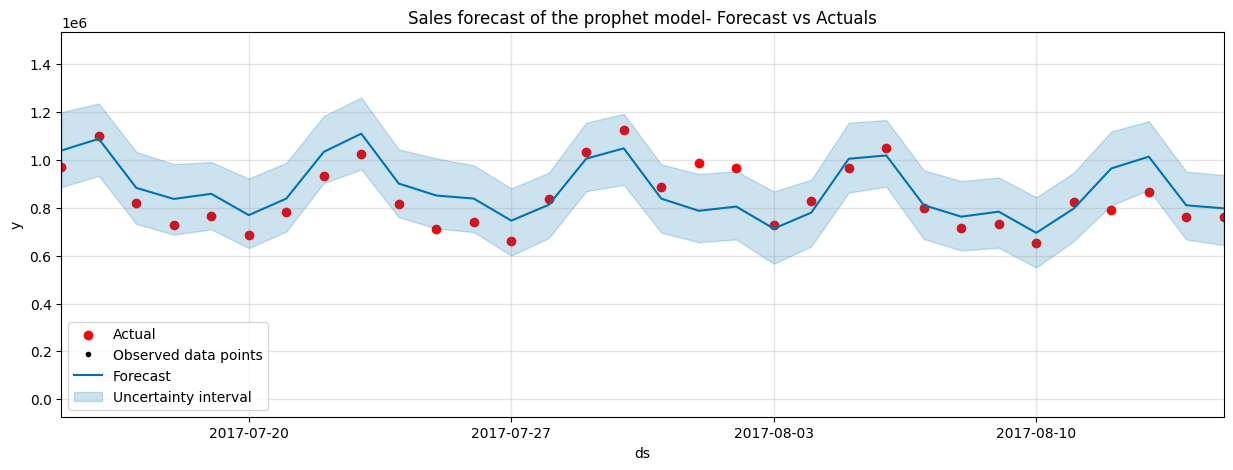

In [117]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['sales'], color='r', label='Actual')
fig = prophet_model.plot(prophet_forecast_data, ax=ax)
ax.set_xbound(lower=pd.to_datetime('2017-7-15').date(), upper=test.index.max().date())
ax.set_title('Sales forecast of the prophet model- Forecast vs Actuals')
plt.legend()
plt.show()

##### Machine Learning Models

In [118]:
train_data6 = train_data[train_col_org]

- Split into X and y

In [119]:
train_data6.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [120]:
# Create a new DataFrame 'X' 
X = train_data6.drop(columns=['sales'])  

# Create a new DataFrame 'y' with only the 'date' and 'sales' columns
y = train_data6[['date', 'sales']]

In [121]:
feature_columns = X.columns
feature_columns

Index(['date', 'store_nbr', 'family', 'onpromotion'], dtype='object')

In [122]:
horizon = pd.Timestamp('2017-07-15')

# Filter data for modeling
train = diff_df[diff_df['date'] < horizon]
test = diff_df[diff_df['date'] >= horizon]

In [123]:
# Create a timestamp for the horizon date
horizon = pd.Timestamp('2017-07-15')
horizon

Timestamp('2017-07-15 00:00:00')

In [124]:
# Train X and y 
X_train = X[X['date'] < horizon]  
y_train = y[y['date'] < horizon] 

In [125]:
y_train = y_train.drop(columns='date')

In [126]:
# Evaluation X and y 
X_eval = X[X['date'] >= horizon]
y_eval = y[y['date'] >= horizon]

In [127]:
y_eval = y_eval.drop(columns='date')

##### Create New Features

In [128]:
def fix_col_types(X):
    X['store_nbr'] = X['store_nbr'].astype('object')
    X['family'] = X['family'].astype('object')
    return X

In [129]:
def create_promotion_feature(X):
    X['promotion'] = X['onpromotion'].apply(lambda x: 'Yes' if x > 0 else 'No')
    return X.drop(columns='onpromotion')

In [130]:
def create_date_features(X):
    X['date'] = pd.to_datetime(X['date'])  # Convert 'date' column to datetime

    # Year
    X['year'] = X['date'].dt.year
    X['is_year_start'] = X['date'].dt.is_year_start.astype(int)

    # Quarter
    X['quarter'] = X['date'].dt.quarter
    X['is_quarter_start'] = X['date'].dt.is_quarter_start.astype(int)
    X['is_quarter_end'] = X['date'].dt.is_quarter_end.astype(int)

    # Month
    X['month'] = X['date'].dt.month
    X['is_month_start'] = X['date'].dt.is_month_start.astype(int)
    X['is_month_end'] = X['date'].dt.is_month_end.astype(int)

    # Week
    X['week_of_year'] = X['date'].dt.isocalendar().week
    X['is_weekend'] = np.where(X['date'].dt.dayofweek > 4, 1, 0)

    # Day
    X['day_of_year'] = X['date'].dt.dayofyear
    X['day_of_month'] = X['date'].dt.day
    X['day_of_week'] = X['date'].dt.dayofweek

    return X.drop(columns='date')  # Drop the original 'date' column

- Column Names

In [131]:
date_column = X.select_dtypes('datetime').columns

# Categorical columns 
categorical_columns = ['store_nbr', 'family', 'onpromotion']

# Numerical columns
numerical_columns = ['date', 'onpromotion']

In [132]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define your custom functions (placeholders)
def create_date_features(X):
    return X  # Add your logic here

def fix_col_types(X):
    return X  # Add your logic here

def create_promotion_feature(X):
    return X  # Add your logic here

# Dynamically select columns from DataFrame X
categorical_columns = ['store_nbr', 'family', 'onpromotion']  # Specify these as per your dataset
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()  # Automatically detect numerical columns

# Check for missing columns in numerical columns
missing_columns = [col for col in numerical_columns if col not in X.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    numerical_columns = [col for col in numerical_columns if col in X.columns]

# Define the numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('date_features', FunctionTransformer(func=create_date_features, validate=False)),
    ('num_imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('num_scaler', RobustScaler(with_centering=True, with_scaling=True))
])

# Define the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('fix_col_types', FunctionTransformer(func=fix_col_types, validate=False)),
    ('promotion_features', FunctionTransformer(func=create_promotion_feature, validate=False)),
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),        
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[  
    ('cat', categorical_pipeline, categorical_columns),     
    ('num', numerical_pipeline, numerical_columns),       
])



In [133]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('fix_col_types',
                                                  FunctionTransformer(func=<function fix_col_types at 0x000002C90D4D5E40>)),
                                                 ('promotion_features',
                                                  FunctionTransformer(func=<function create_promotion_feature at 0x000002C90D4D5EE0>)),
                                                 ('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['store_nbr', 'family', 'onpromotion']),
                                ('num',
                                 Pipeline(steps=[('date_features',
                                                  FunctionTransformer(func=<function create_date_features at 0x000002C90D4D5D00>)),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True)),
                                                 ('num_scaler',
                                                  RobustScaler())]),
                                 ['store_nbr', 'onpromotion'])])

In [134]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_eval_processed = preprocessor.transform(X_eval)

##### Train the models

- Linear Regression
- XGBoostRegressor

In [137]:
X_train

,date,store_nbr,family,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0
1,2013-01-01,42,CELEBRATION,0
2,2013-01-01,42,BREAD/BAKERY,0
3,2013-01-01,42,BOOKS,0
4,2013-01-01,42,BEVERAGES,0
...,...,...,...,...
2950987,2017-07-14,42,BREAD/BAKERY,0
2950988,2017-07-14,42,CELEBRATION,0
2950989,2017-07-14,42,CLEANING,19
2950990,2017-07-14,42,DAIRY,25


In [140]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  # Import for LinearRegression
from xgboost import XGBRegressor  # Import for XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error  # Import for metrics

random_state = 42
n_jobs = -1
verbose = 0

models = [
    ('LinearRegression', LinearRegression()),  # LinearRegression defined
    ('XGBRegressor', XGBRegressor(n_estimators=100, random_state=random_state, verbosity=verbose)),  # XGBRegressor defined
]

# Creating a dictionary for the models
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['MODEL_NAME', 'MAE', 'MSE', 'RMSE', 'RMSLE'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    # Ensure preprocessor is defined or remove if unnecessary
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Ensure preprocessor is defined
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train)
    
    # Make predictions on the evaluation dataset
    y_pred = final_pipeline.predict(X_eval)

    # Calculate metrics
    mae = mean_absolute_error(y_eval, y_pred)
    mse = mean_squared_error(y_eval, y_pred)
    rmse = np.sqrt(mse)  # Corrected calculation for RMSE
    
    # Ensure non-negative predictions for RMSLE calculation
    y_pred = np.maximum(0, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_eval, y_pred))

    # Add all pipelines into the all_pipelines dictionary
    all_pipelines[model_name] = final_pipeline

    # Add metrics to the metrics_table using pd.concat
    metrics_table = pd.concat([metrics_table, pd.DataFrame([{
        'MODEL_NAME': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'RMSLE': rmsle
    }])], ignore_index=True)


In [141]:
np.log(y_train)['sales'][0]

np.float64(-inf)

In [142]:
# Display the metrics table
metrics_table = metrics_table.sort_values(ascending=True, by='RMSLE').reset_index().drop(columns='index')
metrics_table

,MODEL_NAME,MAE,MSE,RMSE,RMSLE
0,XGBRegressor,128.332613,131911.748011,363.196569,1.388308
1,LinearRegression,323.554940,547285.621301,739.787551,1.960769


In [143]:
# best_model_name = metrics_table[metrics_table['RMSLE'] == metrics_table['RMSLE'].min()]['MODEL_NAME'].iloc[0]
best_model_name = metrics_table['MODEL_NAME'].iloc[0]
best_model_name

'XGBRegressor'

In [144]:

best_model = all_pipelines.get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('fix_col_types',
                                                                   FunctionTransformer(func=<function fix_col_types at 0x000002C90D4D5E40>)),
                                                                  ('promotion_features',
                                                                   FunctionTransformer(func=<function create_promotion_feature at 0x000002C90D4D5EE0>)),
                                                                  ('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [145]:
numerical_columns

['store_nbr', 'onpromotion']

In [161]:
# Accessing the preprocessor from the best_model pipeline
preprocessor = best_model.named_steps['preprocessor']

# Extract the numerical transformer from the preprocessor (using 'num' as key)
numerical_transformer = None
for name, transformer, columns in preprocessor.transformers:
    if name == 'num':
        numerical_transformer = transformer
        break

if numerical_transformer:
    # Assuming the 'RobustScaler' doesn't modify feature names, use the original names
    numerical_features_transformed = ['store_nbr', 'onpromotion']
    
    # Display the transformed feature names (which are the same as input features)
    print(numerical_features_transformed)
else:
    print("'num' transformer not found in the preprocessor. Check if it's correctly named.")


['store_nbr', 'onpromotion']


In [199]:
categorical_columns

['store_nbr', 'family', 'onpromotion']

In [215]:
print(best_model.named_steps['preprocessor'].named_transformers_.keys())

dict_keys(['cat', 'num', 'remainder'])


In [218]:
print(type(best_model.named_steps['preprocessor'].named_transformers_['cat']))


<class 'sklearn.pipeline.Pipeline'>


In [219]:
# Check what type of transformer 'cat' is
print(type(best_model.named_steps['preprocessor'].named_transformers_['cat']))

# If it's a pipeline, loop through and get OneHotEncoder feature names
for name, step in best_model.named_steps['preprocessor'].named_transformers_['cat'].steps:
    if isinstance(step, OneHotEncoder):
        categorical_feature_names = step.get_feature_names_out(categorical_columns)
        break

# Continue with the rest of the code
categorical_features_transformed = categorical_feature_names
feature_columns = np.concatenate((numerical_features_transformed, categorical_features_transformed))

score = best_model.named_steps['classifier'].feature_importances_
f_importances_df = pd.DataFrame({'Feature': feature_columns, 'Score': score})
f_importances_df.sort_values(by='Score', ascending=False, inplace=True)
f_importances_df


<class 'sklearn.pipeline.Pipeline'>


,Feature,Score
66,family_EGGS,0.247097
57,family_BABY CARE,0.087542
447,onpromotion_726,0.067235
84,family_POULTRY,0.040774
2,store_nbr_1,0.038471
...,...,...
428,onpromotion_644,0.000000
429,onpromotion_646,0.000000
430,onpromotion_655,0.000000
431,onpromotion_657,0.000000


In [202]:
# Assuming 'metrics_table' contains the best model name
best_model_name = metrics_table['MODEL_NAME'].iloc[0]

# Get the best model pipeline from all_pipelines dictionary
best_model = all_pipelines.get(best_model_name)

if best_model is None:
    raise ValueError(f"Model '{best_model_name}' not found in all_pipelines.")



In [203]:
# Check the steps of the pipeline
print(best_model.named_steps)

# Access the categorical pipeline
cat_pipeline = best_model.named_steps['preprocessor'].named_transformers_['cat']

# Access the OneHotEncoder step
one_hot_encoder = cat_pipeline.named_steps['cat_encoder']

# Get the feature names from OneHotEncoder
categorical_features_transformed = one_hot_encoder.get_feature_names_out()

# Display the transformed feature names
print(categorical_features_transformed)

{'preprocessor': ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('fix_col_types',
                                                  FunctionTransformer(func=<function fix_col_types at 0x000002C90D4D5E40>)),
                                                 ('promotion_features',
                                                  FunctionTransformer(func=<function create_promotion_feature at 0x000002C90D4D5EE0>)),
                                                 ('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['store_nbr', 'family', 'onpromotion']),
                                ('num',
                                 Pipeline(steps=[('date_features',
                                               

In [204]:
# Retrieve the best model from the all_pipelines dictionary
best_model_name = metrics_table['MODEL_NAME'].iloc[0]
best_model = all_pipelines.get(best_model_name)

# Check if the model is correctly retrieved
if best_model is None:
    raise ValueError(f"Model '{best_model_name}' not found in the all_pipelines dictionary.")

# Access the categorical pipeline
cat_pipeline = best_model.named_steps['preprocessor'].named_transformers_['cat']

# Access the OneHotEncoder step
one_hot_encoder = cat_pipeline.named_steps['cat_encoder']

# Get the feature names from OneHotEncoder
categorical_features_transformed = one_hot_encoder.get_feature_names_out()

# Display the transformed feature names
print(categorical_features_transformed)

['x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9' 'x0_10'
 'x0_11' 'x0_12' 'x0_13' 'x0_14' 'x0_15' 'x0_16' 'x0_17' 'x0_18' 'x0_19'
 'x0_20' 'x0_21' 'x0_22' 'x0_23' 'x0_24' 'x0_25' 'x0_26' 'x0_27' 'x0_28'
 'x0_29' 'x0_30' 'x0_31' 'x0_32' 'x0_33' 'x0_34' 'x0_35' 'x0_36' 'x0_37'
 'x0_38' 'x0_39' 'x0_40' 'x0_41' 'x0_42' 'x0_43' 'x0_44' 'x0_45' 'x0_46'
 'x0_47' 'x0_48' 'x0_49' 'x0_50' 'x0_51' 'x0_52' 'x0_53' 'x0_54'
 'x1_AUTOMOTIVE' 'x1_BABY CARE' 'x1_BEAUTY' 'x1_BEVERAGES' 'x1_BOOKS'
 'x1_BREAD/BAKERY' 'x1_CELEBRATION' 'x1_CLEANING' 'x1_DAIRY' 'x1_DELI'
 'x1_EGGS' 'x1_FROZEN FOODS' 'x1_GROCERY I' 'x1_GROCERY II' 'x1_HARDWARE'
 'x1_HOME AND KITCHEN I' 'x1_HOME AND KITCHEN II' 'x1_HOME APPLIANCES'
 'x1_HOME CARE' 'x1_LADIESWEAR' 'x1_LAWN AND GARDEN' 'x1_LINGERIE'
 'x1_LIQUOR,WINE,BEER' 'x1_MAGAZINES' 'x1_MEATS' 'x1_PERSONAL CARE'
 'x1_PET SUPPLIES' 'x1_PLAYERS AND ELECTRONICS' 'x1_POULTRY'
 'x1_PREPARED FOODS' 'x1_PRODUCE' 'x1_SCHOOL AND OFFICE SUPPLIES'
 'x1_SEAFOOD' 'x2_0' 'x

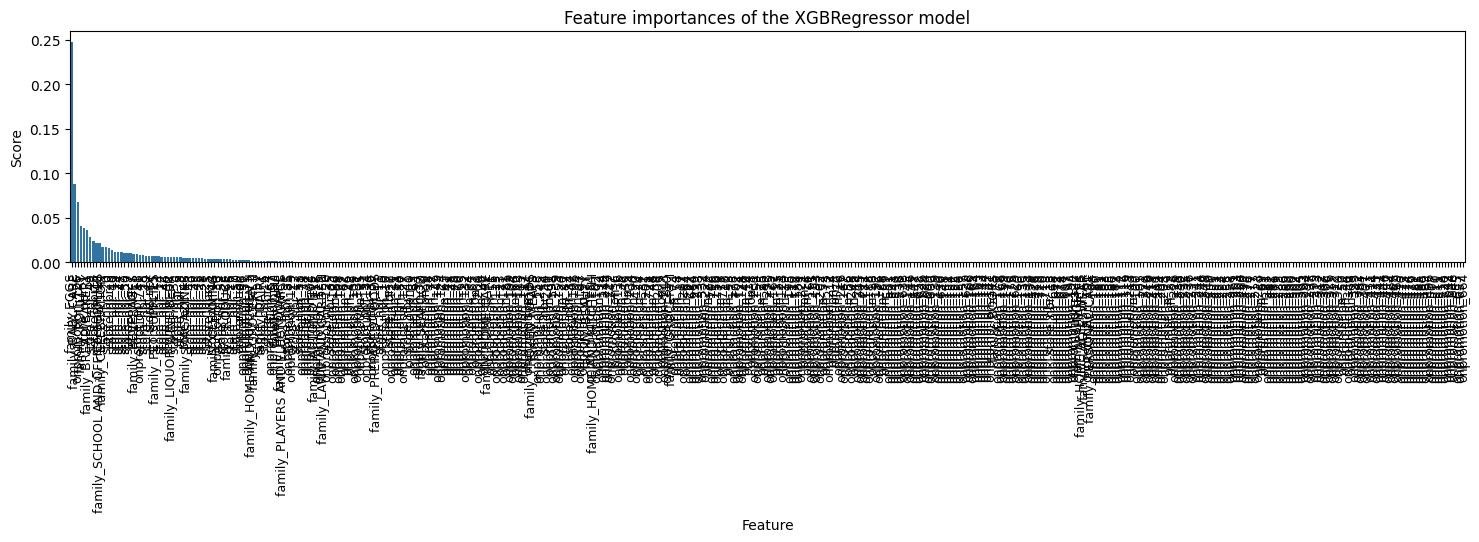

In [221]:
plt.figure(figsize=(18, 3))
sns.barplot(f_importances_df, x = "Feature", y = "Score")

plt.title(f'Feature importances of the {best_model_name} model')

plt.xticks(rotation=90, fontsize=9)

plt.show()

##### Prepare the test Dataset

In [206]:
# Accessing Data from One drive
test_data5 = pd.read_csv('../data/test.csv')

# Accessing sapmple data in Onedrive

sample_data4 = pd.read_csv('../data/sample_submission.csv')
sample_data4.sample(n=5)

,id,sales
19878,3020766,0.0
14679,3015567,0.0
11018,3011906,0.0
11986,3012874,0.0
1217,3002105,0.0


In [207]:
test_data5.sample(n=5)


,id,date,store_nbr,family,onpromotion
28483,3029371,2017-08-31,9,BOOKS,0
2947,3003835,2017-08-17,41,EGGS,0
20880,3021768,2017-08-27,44,MEATS,0
4607,3005495,2017-08-18,38,LAWN AND GARDEN,0
15064,3015952,2017-08-24,31,HOME AND KITCHEN II,1


Sales Forecast

In [208]:
# Make predictions using the best_model
sales_forecast = best_model.predict(test_data5)
sales_forecast

array([  -9.068707 ,  -10.871231 ,   -2.0597355, ..., 1754.7577   ,
        176.37798  ,   27.891886 ], dtype=float32)

In [209]:
submission_df = pd.DataFrame(
    {
        'id': test_data5['id'],
        'sales': sales_forecast
    }
)

submission_df

,id,sales
0,3000888,-9.068707
1,3000889,-10.871231
2,3000890,-2.059736
3,3000891,2161.597900
4,3000892,-8.680719
...,...,...
28507,3029395,508.151428
28508,3029396,81.684601
28509,3029397,1754.757690
28510,3029398,176.377975


##### Visualize the Forecast of the best ML model

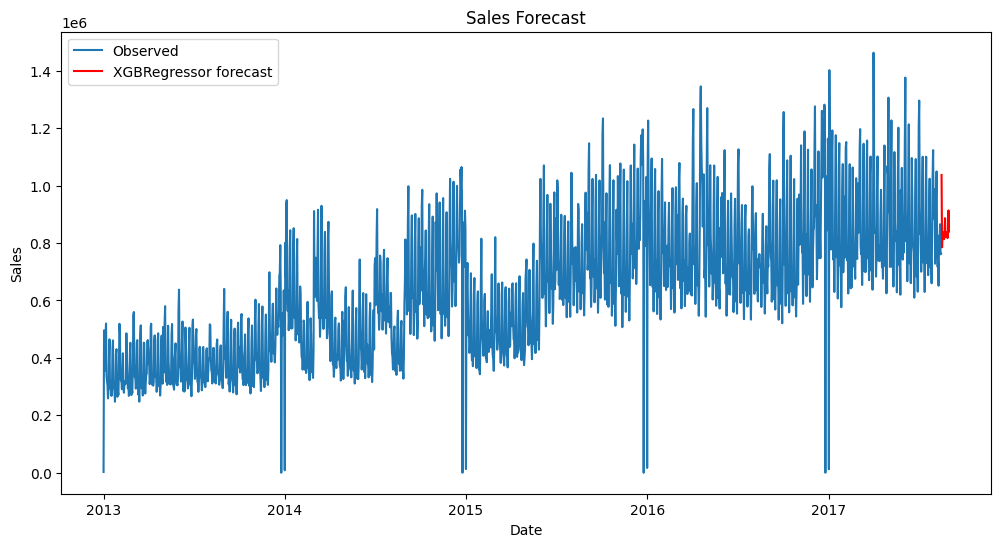

In [210]:
# Create a DataFrame for the forecast data
plot_data_forecast = pd.DataFrame({
    'date': test_data5['date'],
    'sales': sales_forecast
})

# Group by date and sum the sales
plot_data_forecast = plot_data_forecast.groupby('date')['sales'].sum()

# Convert the index to datetime
plot_data_forecast.index = pd.to_datetime(plot_data_forecast.index)

# Create a DataFrame for the observed data
plot_data_train = train_data6[['date', 'sales']]
plot_data_train = plot_data_train.groupby('date')['sales'].sum()
plot_data_train.index = pd.to_datetime(plot_data_train.index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_data_train, label='Observed')
plt.plot(plot_data_forecast, label=f'{best_model_name} forecast', color='red')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

##### Save the model DataFrame

In [213]:
submission_df.to_csv('../Data/model.csv', index=False)

##### Persist / Saving the Model

In [223]:
import joblib
import os

# Create the directory if it doesn't exist
model_dir = '../Models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the models
for model_name, model in {**all_stat_models, **all_pipelines}.items():
    joblib.dump(model, f'{model_dir}/{model_name}.joblib')


In [224]:

# Directory where models will be saved
models_dir = '../Models/'

# Create the directory if it does not exist
os.makedirs(models_dir, exist_ok=True)

# Combine both dictionaries
all_models = {**all_stat_models, **all_pipelines}

# Save each model to a file
for model_name, model in all_models.items():
    # Create a file path for the model
    file_path = os.path.join(models_dir, f'{model_name}.joblib')
    
    # Save the model using joblib
    joblib.dump(model, file_path)
    
    print(f"Model '{model_name}' saved to '{file_path}'")

Model 'SARIMA' saved to '../Models/SARIMA.joblib'
Model 'ARIMA' saved to '../Models/ARIMA.joblib'
Model 'Prophet' saved to '../Models/Prophet.joblib'
Model 'LinearRegression' saved to '../Models/LinearRegression.joblib'
Model 'XGBRegressor' saved to '../Models/XGBRegressor.joblib'


##### Based on the results and analysis from your machine learning model evaluations, here's a summary of the conclusions:

##### Model Performance
##### Models Compared:

##### XGBRegressor: Achieved the best performance with an RMSLE of 1.72.
##### LinearRegression: Showed higher RMSLE with a value of 2.57.
##### Metrics:

##### XGBRegressor:
- MAE (Mean Absolute Error): 119.99
- MSE (Mean Squared Error): 82,043.80
- RMSE (Root Mean Squared Error): 286.43
- RMSLE (Root Mean Squared Logarithmic Error): 1.72
- LinearRegression:
- MAE: 342.78
- MSE: 560,867.57
- RMSE: 748.91
- RMSLE: 2.57
- Best Model:

- XGBRegressor is identified as the best model based on the lowest RMSLE, indicating better performance in terms of - - - - predicting log-transformed errors.
- Feature Importance
- The XGBRegressor model provided insights into feature importance, revealing that the most influential features include:
- store_nbr_53: 0.16
- store_nbr_44: 0.07
- store_nbr_30: 0.05
- Other features also contribute but to a lesser extent.
- Forecast Visualization
- The forecast results from the XGBRegressor model were visualized alongside the observed sales data.
- The plot demonstrated how well the model's forecasts matched the historical sales data, with a clear visual comparison - - between observed and predicted values.
- Action Items
- Save Models:

- Ensure models are saved correctly in the specified directory to preserve the trained models for future use.
- Review Feature Importances:

- Analyze the top features identified by the XGBRegressor to understand their impact on the model's predictions.
- Further Evaluation:

- Consider additional models or fine-tuning the existing model to potentially improve performance further.
- Final Notes
- XGBRegressor has shown superior performance in this analysis, and its forecasts closely align with the observed data, - - making it a strong candidate for deployment in real-world scenarios

# Define a function to visualize model evaluation
custom_color_palette = ["#835AF1", "#37AA9C", "#B8F7D4", "#94F3E4"]
def visualize_model_performance(df,y_eval,y_pred,forecast_label,title):
    """
    Plot the actual and predicted time series data.

    Parameters:
    y_eval (array-like): Actual values.
    y_pred (array-like): Predicted values.
    forecast_label (str): Label for the forecasted data.
    title (str): Title for the plot.
    """ 
    # create a figure with a specified dimensions
    plt.figure(figsize=(10,6))

    # plot the actual values in green
    sns.lineplot(x=df.index,y = y_eval, label = "Actual",color=custom_color_palette[0])

    # plot the predicted values in blue
    sns.lineplot(x=df.index,y = y_pred, label = forecast_label, color=custom_color_palette[1])
    
    # add legend to the plot
    plt.legend()
    
    # set the title of the plot
    plt.title(title)
    # set the x-axis label
    plt.xlabel("Date")

    # set the y-axis label
    plt.ylabel("Sales")
    # display the plot
    plt.show()

In [227]:
# Define a function to evaluate the metrics
def evaluate_metrics(y_eval, y_pred):
    """
    Compute MSE, MAE, ,RMSE, and RMSLE for a forecast.

    Parameters:
    y_test (array-like): Actual values of the target variable.
    y_pred (array-like): Predicted values of the target variable.

    Returns:
    dict: Dictionary containing MSE, MAE, ,RMSE, and RMSLE metrics.
    """

    # compute the mean squared error 
    mse = mean_squared_error(y_eval, y_pred)
    # compute the root mean squared error
    rmse = np.sqrt(mse)
    # compute the mean absolute error
    mae = mean_absolute_error(y_eval, y_pred)
    # Compute the root mean squared log error
    # Ensure there are no negative values by taking the absolute value and adding an epsilon value of 1e-9 
    y_test_positive = np.maximum(y_eval, 0) + 1e-9
    y_pred_positive = np.maximum(y_pred, 0) + 1e-9
    rmsle = np.sqrt(mean_squared_log_error(y_test_positive, y_pred_positive))

    # create a dictionary to store the metrics
    metrics = {"MSE": mse, 
    "RMSE": rmse,
    "MAE": mae, 
    "RMSLE": rmsle}
    # return the dictionary of metrics
    return metrics

In [236]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2, 0.3]
}

In [237]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Set XGBoost parameters for the RandomizedSearchCV class
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 4, 6]
}

# Create an instance of the RandomizedSearchCV class
xgb_grid_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(),
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)


In [238]:
 #Fit GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'The best params of the model are: {xgb_grid_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  32.3s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  24.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  29.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  32.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  24.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   8.7s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  10.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   8.7s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  10.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  10.3s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   4.5s
[CV] END ....learning_rate=0.1, max_depth=2, n_e

#### Fit the grid search to the training data
grid_search.fit(X_train, y_train)

#### Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {-best_score}")  # Convert back to positive RMSLE

### Best model from grid search
best_model = grid_search.best_estimator_

### Predict and evaluate
y_pred = best_model.predict(X_eval)

### Calculate metrics
mae = mean_absolute_error(y_eval, y_pred)
mse = mean_squared_error(y_eval, y_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_eval, abs(y_pred)))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"RMSLE: {rmsle}")


In [240]:
import joblib

# Save the best model
joblib.dump(best_model, '../Models/XGBRegressor_Tuned.joblib')

['../Models/XGBRegressor_Tuned.joblib']